In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

Using TensorFlow backend.


In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [7]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 1 #for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 5 #for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000
params.nV = 200
params.nD = 400
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [8]:
# sim = MaaSSim.simulators.simulate(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
#                                   kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

sim_rln = MaaSSim.simulators.simulate_RLn(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

This simulation uses albatros data


[2023-03-18 01:22:56,522] Setting up 4h simulation at 2023-03-17 23:22:39 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands


initialization-----------------------
state_size =  2   action_size =  3   Lever = Commission   step =  0.05
fare =  1.2   comm_rate =  0.1   disc =  0.0   marketing = 0-100
-------------------------------------
Day =  0
comm_rate =  0.15


[2023-03-18 01:23:05,016] simulation time 3.7 s


nP =  0    nV =  0
Day =  1
comm_rate =  0.2


[2023-03-18 01:23:13,997] simulation time 3.9 s


nP =  21    nV =  1
Day =  2
comm_rate =  0.15


[2023-03-18 01:23:22,900] simulation time 4.1 s


nP =  35    nV =  1
Day =  3
comm_rate =  0.15


[2023-03-18 01:23:32,756] simulation time 4.9 s


nP =  56    nV =  4
Day =  4
comm_rate =  0.15


[2023-03-18 01:23:44,600] simulation time 7.0 s


nP =  84    nV =  8
Day =  5
comm_rate =  0.1


[2023-03-18 01:23:55,472] simulation time 6.0 s


nP =  105    nV =  6
Day =  6
comm_rate =  0.1


[2023-03-18 01:24:07,138] simulation time 6.6 s


nP =  116    nV =  13
Day =  7
comm_rate =  0.05


[2023-03-18 01:24:18,905] simulation time 6.7 s


nP =  124    nV =  14
Day =  8
comm_rate =  0


[2023-03-18 01:24:30,870] simulation time 7.2 s


nP =  136    nV =  21
Day =  9
comm_rate =  0.05


[2023-03-18 01:24:42,874] simulation time 7.2 s


nP =  145    nV =  13
Day =  10
comm_rate =  0


[2023-03-18 01:24:54,535] simulation time 6.6 s


nP =  131    nV =  8
Day =  11
comm_rate =  0.05


[2023-03-18 01:25:07,003] simulation time 7.5 s


nP =  156    nV =  12
Day =  12
comm_rate =  0


[2023-03-18 01:25:19,591] simulation time 7.6 s


nP =  167    nV =  13
Day =  13
comm_rate =  0.05


[2023-03-18 01:25:31,896] simulation time 7.5 s


nP =  155    nV =  15
Day =  14
comm_rate =  0.1


[2023-03-18 01:25:44,568] simulation time 7.7 s


nP =  171    nV =  11
Day =  15
comm_rate =  0.1


[2023-03-18 01:25:56,468] simulation time 7.0 s


nP =  137    nV =  19
Day =  16
comm_rate =  0.15


[2023-03-18 01:26:08,899] simulation time 7.4 s


nP =  147    nV =  16
Day =  17
comm_rate =  0.15


[2023-03-18 01:26:21,509] simulation time 7.8 s


nP =  158    nV =  15
Day =  18
comm_rate =  0.15


[2023-03-18 01:26:34,698] simulation time 8.3 s


nP =  189    nV =  20
Day =  19
comm_rate =  0.2


[2023-03-18 01:26:46,979] simulation time 7.2 s


nP =  152    nV =  10
Day =  20
comm_rate =  0.25


[2023-03-18 01:27:00,014] simulation time 8.2 s


nP =  176    nV =  18
Day =  21
comm_rate =  0.2


[2023-03-18 01:27:12,451] simulation time 7.6 s


nP =  163    nV =  13
Day =  22
comm_rate =  0.2


[2023-03-18 01:27:24,642] simulation time 7.1 s


nP =  147    nV =  10
Day =  23
comm_rate =  0.2


[2023-03-18 01:27:37,103] simulation time 7.6 s


nP =  160    nV =  20
Day =  24
comm_rate =  0.25


[2023-03-18 01:27:49,626] simulation time 7.5 s


nP =  160    nV =  11
Day =  25
comm_rate =  0.25


[2023-03-18 01:28:02,465] simulation time 7.8 s


nP =  162    nV =  22
Day =  26
comm_rate =  0.25


[2023-03-18 01:28:14,930] simulation time 7.7 s


nP =  161    nV =  15
Day =  27
comm_rate =  0.25


[2023-03-18 01:28:28,041] simulation time 8.1 s


nP =  181    nV =  18
Day =  28
comm_rate =  0.25


[2023-03-18 01:28:40,589] simulation time 7.7 s


nP =  159    nV =  20
Day =  29
comm_rate =  0.2


[2023-03-18 01:28:53,410] simulation time 7.8 s


nP =  154    nV =  17
Day =  30
comm_rate =  0.25


[2023-03-18 01:29:06,302] simulation time 7.5 s


nP =  155    nV =  17
Day =  31
comm_rate =  0.2


[2023-03-18 01:29:18,530] simulation time 7.4 s


nP =  161    nV =  11
Day =  32
comm_rate =  0.25


[2023-03-18 01:29:31,747] simulation time 8.2 s


nP =  182    nV =  19
Day =  33
comm_rate =  0.3


[2023-03-18 01:29:44,310] simulation time 7.8 s


nP =  165    nV =  16
Day =  34
comm_rate =  0.25


[2023-03-18 01:29:57,313] simulation time 8.0 s


nP =  176    nV =  13
Day =  35
comm_rate =  0.2


[2023-03-18 01:30:10,273] simulation time 8.0 s


nP =  178    nV =  16
Day =  36
comm_rate =  0.25


[2023-03-18 01:30:23,091] simulation time 7.8 s


nP =  170    nV =  13
Day =  37
comm_rate =  0.25


[2023-03-18 01:30:36,056] simulation time 8.1 s


nP =  181    nV =  20
Day =  38
comm_rate =  0.25


[2023-03-18 01:30:49,050] simulation time 7.9 s


nP =  172    nV =  18
Day =  39
comm_rate =  0.2


[2023-03-18 01:31:01,484] simulation time 7.4 s


nP =  151    nV =  15
Day =  40
comm_rate =  0.2


[2023-03-18 01:31:14,296] simulation time 8.0 s


nP =  177    nV =  18
Day =  41
comm_rate =  0.2


[2023-03-18 01:31:27,362] simulation time 8.0 s


nP =  177    nV =  16
Day =  42
comm_rate =  0.2


[2023-03-18 01:31:39,486] simulation time 7.3 s


nP =  146    nV =  15
Day =  43
comm_rate =  0.2


[2023-03-18 01:31:52,750] simulation time 8.2 s


nP =  182    nV =  19
Day =  44
comm_rate =  0.15


[2023-03-18 01:32:05,056] simulation time 7.4 s


nP =  153    nV =  15
Day =  45
comm_rate =  0.1


[2023-03-18 01:32:18,408] simulation time 8.3 s


nP =  186    nV =  20
Day =  46
comm_rate =  0.05


[2023-03-18 01:32:31,060] simulation time 7.8 s


nP =  180    nV =  14
Day =  47
comm_rate =  0.05


[2023-03-18 01:32:43,816] simulation time 7.9 s


nP =  173    nV =  17
Day =  48
comm_rate =  0.1


[2023-03-18 01:32:56,137] simulation time 7.2 s


nP =  172    nV =  8
Day =  49
comm_rate =  0.15


[2023-03-18 01:33:08,607] simulation time 7.6 s


nP =  162    nV =  16
Day =  50
comm_rate =  0.2


[2023-03-18 01:33:21,193] simulation time 7.5 s


nP =  158    nV =  14
Day =  51
comm_rate =  0.15


[2023-03-18 01:33:34,251] simulation time 8.3 s


nP =  175    nV =  22
Day =  52
comm_rate =  0.2


[2023-03-18 01:33:46,847] simulation time 7.7 s


nP =  168    nV =  13
Day =  53
comm_rate =  0.2


[2023-03-18 01:33:59,261] simulation time 7.5 s


nP =  157    nV =  17
Day =  54
comm_rate =  0.2


[2023-03-18 01:34:12,425] simulation time 8.0 s


nP =  178    nV =  21
Day =  55
comm_rate =  0.15


[2023-03-18 01:34:25,112] simulation time 7.8 s


nP =  167    nV =  14
Day =  56
comm_rate =  0.2


[2023-03-18 01:34:38,529] simulation time 8.3 s


nP =  186    nV =  20
Day =  57
comm_rate =  0.25


[2023-03-18 01:34:51,058] simulation time 7.7 s


nP =  163    nV =  14
Day =  58
comm_rate =  0.25


[2023-03-18 01:35:04,257] simulation time 8.1 s


nP =  179    nV =  13
Day =  59
comm_rate =  0.25


[2023-03-18 01:35:17,327] simulation time 8.1 s


nP =  183    nV =  24
Day =  60
comm_rate =  0.25


[2023-03-18 01:35:30,231] simulation time 8.0 s


nP =  175    nV =  20
Day =  61
comm_rate =  0.3


[2023-03-18 01:35:43,364] simulation time 8.0 s


nP =  175    nV =  19
Day =  62
comm_rate =  0.35


[2023-03-18 01:35:56,452] simulation time 8.2 s


nP =  184    nV =  22
Day =  63
comm_rate =  0.4


[2023-03-18 01:36:09,379] simulation time 7.8 s


nP =  174    nV =  12
Day =  64
comm_rate =  0.4


[2023-03-18 01:36:21,811] simulation time 7.5 s


nP =  156    nV =  24
Day =  65
comm_rate =  0.35


[2023-03-18 01:36:34,235] simulation time 7.5 s


nP =  155    nV =  15
Day =  66
comm_rate =  0.3


[2023-03-18 01:36:46,892] simulation time 7.6 s


nP =  164    nV =  12
Day =  67
comm_rate =  0.3


[2023-03-18 01:36:59,555] simulation time 7.8 s


nP =  166    nV =  16
Day =  68
comm_rate =  0.25


[2023-03-18 01:37:13,052] simulation time 8.6 s


nP =  187    nV =  22
Day =  69
comm_rate =  0.2


[2023-03-18 01:37:26,399] simulation time 8.4 s


nP =  196    nV =  18
Day =  70
comm_rate =  0.25


[2023-03-18 01:37:39,355] simulation time 8.1 s


nP =  179    nV =  23
Day =  71
comm_rate =  0.3


[2023-03-18 01:37:52,708] simulation time 8.2 s


nP =  186    nV =  20
Day =  72
comm_rate =  0.35


[2023-03-18 01:38:06,227] simulation time 8.7 s


nP =  205    nV =  19
Day =  73
comm_rate =  0.3


[2023-03-18 01:38:19,817] simulation time 8.6 s


nP =  192    nV =  27
Day =  74
comm_rate =  0.25


[2023-03-18 01:38:32,686] simulation time 8.0 s


nP =  192    nV =  12
Day =  75
comm_rate =  0.2


[2023-03-18 01:38:46,031] simulation time 8.4 s


nP =  196    nV =  15
Day =  76
comm_rate =  0.2


[2023-03-18 01:38:59,658] simulation time 8.4 s


nP =  197    nV =  16
Day =  77
comm_rate =  0.2


[2023-03-18 01:39:12,823] simulation time 8.2 s


nP =  189    nV =  14
Day =  78
comm_rate =  0.25


[2023-03-18 01:39:26,111] simulation time 8.3 s


nP =  190    nV =  19
Day =  79
comm_rate =  0.3


[2023-03-18 01:39:39,614] simulation time 8.3 s


nP =  192    nV =  19
Day =  80
comm_rate =  0.25


[2023-03-18 01:39:52,124] simulation time 7.6 s


nP =  205    nV =  8
Day =  81
comm_rate =  0.3


[2023-03-18 01:40:05,650] simulation time 8.6 s


nP =  202    nV =  15
Day =  82
comm_rate =  0.3


[2023-03-18 01:40:19,278] simulation time 8.5 s


nP =  194    nV =  19
Day =  83
comm_rate =  0.35


[2023-03-18 01:40:32,036] simulation time 7.9 s


nP =  181    nV =  11
Day =  84
comm_rate =  0.35


[2023-03-18 01:40:45,532] simulation time 8.6 s


nP =  196    nV =  13
Day =  85
comm_rate =  0.4


[2023-03-18 01:40:59,161] simulation time 8.7 s


nP =  209    nV =  18
Day =  86
comm_rate =  0.35


[2023-03-18 01:41:12,343] simulation time 8.3 s


nP =  209    nV =  12
Day =  87
comm_rate =  0.3


[2023-03-18 01:41:25,858] simulation time 8.2 s


nP =  200    nV =  12
Day =  88
comm_rate =  0.3


[2023-03-18 01:41:39,702] simulation time 8.9 s


nP =  207    nV =  17
Day =  89
comm_rate =  0.35


[2023-03-18 01:41:52,419] simulation time 7.9 s


nP =  186    nV =  11
Day =  90
comm_rate =  0.3


[2023-03-18 01:42:06,180] simulation time 8.6 s


nP =  203    nV =  17
Day =  91
comm_rate =  0.3


[2023-03-18 01:42:19,764] simulation time 8.7 s


nP =  205    nV =  15
Day =  92
comm_rate =  0.35


[2023-03-18 01:42:33,016] simulation time 8.4 s


nP =  192    nV =  21
Day =  93
comm_rate =  0.4


[2023-03-18 01:42:46,585] simulation time 8.4 s


nP =  194    nV =  14
Day =  94
comm_rate =  0.45


[2023-03-18 01:43:00,221] simulation time 8.8 s


nP =  209    nV =  23
Day =  95
comm_rate =  0.45


[2023-03-18 01:43:13,739] simulation time 8.6 s


nP =  200    nV =  16
Day =  96
comm_rate =  0.5


[2023-03-18 01:43:28,016] simulation time 9.0 s


nP =  223    nV =  16
Day =  97
comm_rate =  0.5


[2023-03-18 01:43:41,972] simulation time 9.0 s


nP =  222    nV =  14
Day =  98
comm_rate =  0.5


[2023-03-18 01:43:54,946] simulation time 8.1 s


nP =  200    nV =  11
Day =  99
comm_rate =  0.45


[2023-03-18 01:44:09,488] simulation time 9.2 s


nP =  221    nV =  14
Day =  100
comm_rate =  0.4


[2023-03-18 01:44:23,366] simulation time 8.9 s


nP =  216    nV =  17
Day =  101
comm_rate =  0.45


[2023-03-18 01:44:37,390] simulation time 9.1 s


nP =  224    nV =  16
Day =  102
comm_rate =  0.45


[2023-03-18 01:44:51,410] simulation time 9.0 s


nP =  221    nV =  15
Day =  103
comm_rate =  0.45


[2023-03-18 01:45:05,707] simulation time 9.0 s


nP =  220    nV =  16
Day =  104
comm_rate =  0.4


[2023-03-18 01:45:19,165] simulation time 8.5 s


nP =  196    nV =  14
Day =  105
comm_rate =  0.4


[2023-03-18 01:45:33,172] simulation time 9.1 s


nP =  243    nV =  12
Day =  106
comm_rate =  0.35


[2023-03-18 01:45:47,577] simulation time 9.4 s


nP =  240    nV =  14
Day =  107
comm_rate =  0.3


[2023-03-18 01:46:01,105] simulation time 8.5 s


nP =  202    nV =  14
Day =  108
comm_rate =  0.25


[2023-03-18 01:46:14,744] simulation time 8.7 s


nP =  225    nV =  12
Day =  109
comm_rate =  0.25


[2023-03-18 01:46:28,906] simulation time 9.1 s


nP =  226    nV =  17
Day =  110
comm_rate =  0.25


[2023-03-18 01:46:43,217] simulation time 9.3 s


nP =  230    nV =  20
Day =  111
comm_rate =  0.3


[2023-03-18 01:46:57,203] simulation time 8.7 s


nP =  211    nV =  14
Day =  112
comm_rate =  0.25


[2023-03-18 01:47:10,101] simulation time 7.9 s


nP =  236    nV =  8
Day =  113
comm_rate =  0.2


[2023-03-18 01:47:24,620] simulation time 9.5 s


nP =  232    nV =  23
Day =  114
comm_rate =  0.15


[2023-03-18 01:47:38,048] simulation time 8.4 s


nP =  242    nV =  10
Day =  115
comm_rate =  0.1


[2023-03-18 01:47:52,344] simulation time 9.0 s


nP =  240    nV =  13
Day =  116
comm_rate =  0.15


[2023-03-18 01:48:06,608] simulation time 9.3 s


nP =  232    nV =  16
Day =  117
comm_rate =  0.2


[2023-03-18 01:48:20,397] simulation time 8.8 s


nP =  210    nV =  18
Day =  118
comm_rate =  0.2


[2023-03-18 01:48:34,390] simulation time 9.0 s


nP =  223    nV =  14
Day =  119
comm_rate =  0.2


[2023-03-18 01:48:48,567] simulation time 9.1 s


nP =  208    nV =  22
Day =  120
comm_rate =  0.2


[2023-03-18 01:49:01,798] simulation time 8.2 s


nP =  225    nV =  10
Day =  121
comm_rate =  0.15


[2023-03-18 01:49:15,173] simulation time 8.4 s


nP =  191    nV =  19
Day =  122
comm_rate =  0.1


[2023-03-18 01:49:29,788] simulation time 9.7 s


nP =  244    nV =  24
Day =  123
comm_rate =  0.1


[2023-03-18 01:49:43,334] simulation time 8.3 s


nP =  219    nV =  9
Day =  124
comm_rate =  0.1


[2023-03-18 01:49:57,272] simulation time 8.9 s


nP =  224    nV =  13
Day =  125
comm_rate =  0.15


[2023-03-18 01:50:11,135] simulation time 8.9 s


nP =  217    nV =  14
Day =  126
comm_rate =  0.2


[2023-03-18 01:50:24,683] simulation time 8.5 s


nP =  212    nV =  12
Day =  127
comm_rate =  0.25


[2023-03-18 01:50:38,308] simulation time 8.6 s


nP =  207    nV =  12
Day =  128
comm_rate =  0.3


[2023-03-18 01:50:52,617] simulation time 9.3 s


nP =  239    nV =  13
Day =  129
comm_rate =  0.25


[2023-03-18 01:51:06,436] simulation time 8.8 s


nP =  213    nV =  19
Day =  130
comm_rate =  0.3


[2023-03-18 01:51:21,253] simulation time 9.9 s


nP =  253    nV =  20
Day =  131
comm_rate =  0.35


[2023-03-18 01:51:35,781] simulation time 9.6 s


nP =  246    nV =  17
Day =  132
comm_rate =  0.35


[2023-03-18 01:51:50,247] simulation time 9.4 s


nP =  238    nV =  21
Day =  133
comm_rate =  0.4


[2023-03-18 01:52:05,272] simulation time 9.7 s


nP =  249    nV =  23
Day =  134
comm_rate =  0.45


[2023-03-18 01:52:19,674] simulation time 9.4 s


nP =  234    nV =  21
Day =  135
comm_rate =  0.5


[2023-03-18 01:52:33,277] simulation time 8.6 s


nP =  232    nV =  10
Day =  136
comm_rate =  0.45


[2023-03-18 01:52:47,641] simulation time 9.3 s


nP =  232    nV =  22
Day =  137
comm_rate =  0.5


[2023-03-18 01:53:02,182] simulation time 9.5 s


nP =  242    nV =  16
Day =  138
comm_rate =  0.55


[2023-03-18 01:53:16,375] simulation time 9.1 s


nP =  228    nV =  16
Day =  139
comm_rate =  0.6


[2023-03-18 01:53:30,814] simulation time 9.1 s


nP =  236    nV =  15
Day =  140
comm_rate =  0.65


[2023-03-18 01:53:45,474] simulation time 9.6 s


nP =  279    nV =  12
Day =  141
comm_rate =  0.7


[2023-03-18 01:54:00,061] simulation time 9.6 s


nP =  241    nV =  23
Day =  142
comm_rate =  0.7


[2023-03-18 01:54:14,600] simulation time 9.6 s


nP =  240    nV =  18
Day =  143
comm_rate =  0.7


[2023-03-18 01:54:29,701] simulation time 10.1 s


nP =  273    nV =  16
Day =  144
comm_rate =  0.75


[2023-03-18 01:54:45,174] simulation time 10.1 s


nP =  266    nV =  23
Day =  145
comm_rate =  0.75


[2023-03-18 01:54:59,142] simulation time 9.0 s


nP =  244    nV =  11
Day =  146
comm_rate =  0.75


[2023-03-18 01:55:13,023] simulation time 8.8 s


nP =  228    nV =  12
Day =  147
comm_rate =  0.75


[2023-03-18 01:55:27,411] simulation time 9.4 s


nP =  232    nV =  18
Day =  148
comm_rate =  0.7


[2023-03-18 01:55:41,861] simulation time 9.4 s


nP =  238    nV =  17
Day =  149
comm_rate =  0.65


[2023-03-18 01:55:56,886] simulation time 10.0 s


nP =  266    nV =  16
Day =  150
comm_rate =  0.7


[2023-03-18 01:56:11,042] simulation time 9.1 s


nP =  254    nV =  12
Day =  151
comm_rate =  0.75


[2023-03-18 01:56:25,560] simulation time 9.4 s


nP =  258    nV =  13
Day =  152
comm_rate =  0.7


[2023-03-18 01:56:40,051] simulation time 9.4 s


nP =  235    nV =  16
Day =  153
comm_rate =  0.65


[2023-03-18 01:56:55,072] simulation time 10.0 s


nP =  246    nV =  22
Day =  154
comm_rate =  0.65


[2023-03-18 01:57:09,377] simulation time 9.3 s


nP =  235    nV =  16
Day =  155
comm_rate =  0.6


[2023-03-18 01:57:23,420] simulation time 9.0 s


nP =  226    nV =  14
Day =  156
comm_rate =  0.65


[2023-03-18 01:57:37,749] simulation time 9.3 s


nP =  242    nV =  14
Day =  157
comm_rate =  0.6


[2023-03-18 01:57:52,050] simulation time 9.3 s


nP =  240    nV =  15
Day =  158
comm_rate =  0.65


[2023-03-18 01:58:06,404] simulation time 9.3 s


nP =  231    nV =  18
Day =  159
comm_rate =  0.7


[2023-03-18 01:58:21,731] simulation time 10.3 s


nP =  274    nV =  19
Day =  160
comm_rate =  0.65


[2023-03-18 01:58:36,339] simulation time 9.5 s


nP =  255    nV =  14
Day =  161
comm_rate =  0.65


[2023-03-18 01:58:51,408] simulation time 10.0 s


nP =  259    nV =  20
Day =  162
comm_rate =  0.7


[2023-03-18 01:59:06,328] simulation time 9.9 s


nP =  258    nV =  14
Day =  163
comm_rate =  0.75


[2023-03-18 01:59:20,869] simulation time 9.5 s


nP =  247    nV =  12
Day =  164
comm_rate =  0.8


[2023-03-18 01:59:34,851] simulation time 8.9 s


nP =  266    nV =  10
Day =  165
comm_rate =  0.8


[2023-03-18 01:59:49,244] simulation time 9.3 s


nP =  247    nV =  13
Day =  166
comm_rate =  0.75


[2023-03-18 02:00:03,511] simulation time 9.2 s


nP =  244    nV =  13
Day =  167
comm_rate =  0.7


[2023-03-18 02:00:18,208] simulation time 9.6 s


nP =  246    nV =  17
Day =  168
comm_rate =  0.7


[2023-03-18 02:00:32,233] simulation time 9.0 s


nP =  232    nV =  13
Day =  169
comm_rate =  0.75


[2023-03-18 02:00:46,742] simulation time 9.4 s


nP =  259    nV =  13
Day =  170
comm_rate =  0.75


[2023-03-18 02:01:01,631] simulation time 9.8 s


nP =  254    nV =  18
Day =  171
comm_rate =  0.75


[2023-03-18 02:01:17,396] simulation time 10.7 s


nP =  293    nV =  23
Day =  172
comm_rate =  0.7


[2023-03-18 02:01:32,050] simulation time 9.5 s


nP =  241    nV =  17
Day =  173
comm_rate =  0.65


[2023-03-18 02:01:47,365] simulation time 10.2 s


nP =  272    nV =  20
Day =  174
comm_rate =  0.65


[2023-03-18 02:02:02,236] simulation time 9.8 s


nP =  252    nV =  18
Day =  175
comm_rate =  0.65


[2023-03-18 02:02:17,122] simulation time 9.8 s


nP =  263    nV =  14
Day =  176
comm_rate =  0.6


[2023-03-18 02:02:32,177] simulation time 10.0 s


nP =  263    nV =  20
Day =  177
comm_rate =  0.55


[2023-03-18 02:02:46,507] simulation time 9.2 s


nP =  249    nV =  13
Day =  178
comm_rate =  0.55


[2023-03-18 02:03:00,298] simulation time 8.7 s


nP =  263    nV =  9
Day =  179
comm_rate =  0.5


[2023-03-18 02:03:15,966] simulation time 10.5 s


nP =  283    nV =  18
Day =  180
comm_rate =  0.5


[2023-03-18 02:03:30,575] simulation time 9.5 s


nP =  249    nV =  15
Day =  181
comm_rate =  0.5


[2023-03-18 02:03:45,467] simulation time 9.7 s


nP =  274    nV =  14
Day =  182
comm_rate =  0.5


[2023-03-18 02:03:59,731] simulation time 9.1 s


nP =  244    nV =  12
Day =  183
comm_rate =  0.55


[2023-03-18 02:04:14,691] simulation time 9.9 s


nP =  267    nV =  15
Day =  184
comm_rate =  0.55


[2023-03-18 02:04:28,996] simulation time 9.2 s


nP =  239    nV =  14
Day =  185
comm_rate =  0.6


[2023-03-18 02:04:44,307] simulation time 10.2 s


nP =  268    nV =  19
Day =  186
comm_rate =  0.55


[2023-03-18 02:04:59,398] simulation time 9.9 s


nP =  257    nV =  17
Day =  187
comm_rate =  0.5


[2023-03-18 02:05:13,874] simulation time 9.3 s


nP =  249    nV =  13
Day =  188
comm_rate =  0.45


[2023-03-18 02:05:28,365] simulation time 9.4 s


nP =  235    nV =  17
Day =  189
comm_rate =  0.5


[2023-03-18 02:05:43,301] simulation time 9.8 s


nP =  264    nV =  15
Day =  190
comm_rate =  0.55


[2023-03-18 02:05:57,605] simulation time 9.2 s


nP =  253    nV =  12
Day =  191
comm_rate =  0.5


[2023-03-18 02:06:12,847] simulation time 10.1 s


nP =  264    nV =  21
Day =  192
comm_rate =  0.55


[2023-03-18 02:06:28,376] simulation time 10.4 s


nP =  273    nV =  23
Day =  193
comm_rate =  0.55


[2023-03-18 02:06:43,732] simulation time 10.2 s


nP =  274    nV =  18
Day =  194
comm_rate =  0.6


[2023-03-18 02:06:58,113] simulation time 9.3 s


nP =  251    nV =  12
Day =  195
comm_rate =  0.65


[2023-03-18 02:07:13,256] simulation time 10.0 s


nP =  262    nV =  16
Day =  196
comm_rate =  0.7


[2023-03-18 02:07:28,273] simulation time 9.9 s


nP =  257    nV =  21
Day =  197
comm_rate =  0.75


[2023-03-18 02:07:43,782] simulation time 10.4 s


nP =  294    nV =  15
Day =  198
comm_rate =  0.7


[2023-03-18 02:07:58,986] simulation time 10.1 s


nP =  264    nV =  19
Day =  199
comm_rate =  0.75


[2023-03-18 02:08:12,872] simulation time 8.8 s


nP =  236    nV =  11
Day =  200
comm_rate =  0.75


[2023-03-18 02:08:27,881] simulation time 10.0 s


nP =  265    nV =  16
Day =  201
comm_rate =  0.75


[2023-03-18 02:08:42,995] simulation time 10.0 s


nP =  258    nV =  21
Day =  202
comm_rate =  0.8


[2023-03-18 02:08:58,132] simulation time 10.0 s


nP =  260    nV =  20
Day =  203
comm_rate =  0.75


[2023-03-18 02:09:13,445] simulation time 10.2 s


nP =  274    nV =  17
Day =  204
comm_rate =  0.75


[2023-03-18 02:09:28,776] simulation time 10.2 s


nP =  289    nV =  15
Day =  205
comm_rate =  0.75


[2023-03-18 02:09:44,261] simulation time 10.3 s


nP =  280    nV =  18
Day =  206
comm_rate =  0.8


[2023-03-18 02:09:59,564] simulation time 10.2 s


nP =  268    nV =  18
Day =  207
comm_rate =  0.8


[2023-03-18 02:10:13,746] simulation time 9.1 s


nP =  268    nV =  10
Day =  208
comm_rate =  0.85


[2023-03-18 02:10:28,609] simulation time 9.7 s


nP =  251    nV =  16
Day =  209
comm_rate =  0.9


[2023-03-18 02:10:43,257] simulation time 9.5 s


nP =  256    nV =  13
Day =  210
comm_rate =  0.9


[2023-03-18 02:10:58,483] simulation time 10.2 s


nP =  265    nV =  19
Day =  211
comm_rate =  0.85


[2023-03-18 02:11:13,459] simulation time 9.8 s


nP =  253    nV =  20
Day =  212
comm_rate =  0.85


[2023-03-18 02:11:28,222] simulation time 9.7 s


nP =  251    nV =  17
Day =  213
comm_rate =  0.85


[2023-03-18 02:11:42,183] simulation time 8.8 s


nP =  283    nV =  9
Day =  214
comm_rate =  0.8


[2023-03-18 02:11:57,298] simulation time 10.0 s


nP =  256    nV =  20
Day =  215
comm_rate =  0.85


[2023-03-18 02:12:13,102] simulation time 10.7 s


nP =  291    nV =  18
Day =  216
comm_rate =  0.8


[2023-03-18 02:12:28,651] simulation time 10.5 s


nP =  281    nV =  23
Day =  217
comm_rate =  0.8


[2023-03-18 02:12:44,186] simulation time 10.4 s


nP =  277    nV =  21
Day =  218
comm_rate =  0.85


[2023-03-18 02:12:59,644] simulation time 10.3 s


nP =  287    nV =  17
Day =  219
comm_rate =  0.9


[2023-03-18 02:13:14,854] simulation time 10.1 s


nP =  283    nV =  15
Day =  220
comm_rate =  0.85


[2023-03-18 02:13:29,772] simulation time 9.7 s


nP =  253    nV =  16
Day =  221
comm_rate =  0.9


[2023-03-18 02:13:44,804] simulation time 9.9 s


nP =  259    nV =  19
Day =  222
comm_rate =  0.9


[2023-03-18 02:13:59,127] simulation time 9.2 s


nP =  269    nV =  11
Day =  223
comm_rate =  0.85


[2023-03-18 02:14:14,870] simulation time 10.6 s


nP =  292    nV =  16
Day =  224
comm_rate =  0.85


[2023-03-18 02:14:30,267] simulation time 10.2 s


nP =  282    nV =  17
Day =  225
comm_rate =  0.9


[2023-03-18 02:14:45,283] simulation time 9.9 s


nP =  260    nV =  17
Day =  226
comm_rate =  0.85


[2023-03-18 02:14:59,621] simulation time 9.2 s


nP =  273    nV =  11
Day =  227
comm_rate =  0.8


[2023-03-18 02:15:14,950] simulation time 10.2 s


nP =  269    nV =  23
Day =  228
comm_rate =  0.85


[2023-03-18 02:15:29,932] simulation time 9.9 s


nP =  272    nV =  14
Day =  229
comm_rate =  0.8


[2023-03-18 02:15:44,726] simulation time 9.7 s


nP =  275    nV =  13
Day =  230
comm_rate =  0.85


[2023-03-18 02:15:59,878] simulation time 9.9 s


nP =  267    nV =  14
Day =  231
comm_rate =  0.8


[2023-03-18 02:16:14,484] simulation time 9.5 s


nP =  246    nV =  15
Day =  232
comm_rate =  0.75


[2023-03-18 02:16:29,906] simulation time 10.4 s


nP =  273    nV =  21
Day =  233
comm_rate =  0.7


[2023-03-18 02:16:45,548] simulation time 10.5 s


nP =  275    nV =  21
Day =  234
comm_rate =  0.65


[2023-03-18 02:17:00,347] simulation time 9.7 s


nP =  257    nV =  15
Day =  235
comm_rate =  0.6


[2023-03-18 02:17:15,265] simulation time 9.8 s


nP =  267    nV =  13
Day =  236
comm_rate =  0.6


[2023-03-18 02:17:30,348] simulation time 9.9 s


nP =  264    nV =  15
Day =  237
comm_rate =  0.55


[2023-03-18 02:17:45,876] simulation time 10.4 s


nP =  273    nV =  21
Day =  238
comm_rate =  0.55


[2023-03-18 02:18:00,763] simulation time 9.8 s


nP =  255    nV =  17
Day =  239
comm_rate =  0.5


[2023-03-18 02:18:15,881] simulation time 10.0 s


nP =  272    nV =  15
Day =  240
comm_rate =  0.5


[2023-03-18 02:18:30,322] simulation time 9.3 s


nP =  256    nV =  11
Day =  241
comm_rate =  0.55


[2023-03-18 02:18:45,220] simulation time 9.8 s


nP =  267    nV =  14
Day =  242
comm_rate =  0.6


[2023-03-18 02:19:00,989] simulation time 10.6 s


nP =  293    nV =  18
Day =  243
comm_rate =  0.55


[2023-03-18 02:19:15,780] simulation time 9.7 s


nP =  277    nV =  12
Day =  244
comm_rate =  0.5


[2023-03-18 02:19:30,837] simulation time 9.9 s


nP =  264    nV =  16
Day =  245
comm_rate =  0.55


[2023-03-18 02:19:45,493] simulation time 9.5 s


nP =  256    nV =  14
Day =  246
comm_rate =  0.6


[2023-03-18 02:20:01,690] simulation time 11.1 s


nP =  310    nV =  18
Day =  247
comm_rate =  0.65


[2023-03-18 02:20:17,075] simulation time 10.2 s


nP =  267    nV =  18
Day =  248
comm_rate =  0.7


[2023-03-18 02:20:32,013] simulation time 9.8 s


nP =  264    nV =  14
Day =  249
comm_rate =  0.7


[2023-03-18 02:20:47,053] simulation time 9.8 s


nP =  262    nV =  15
Day =  250
comm_rate =  0.65


[2023-03-18 02:21:02,494] simulation time 10.3 s


nP =  295    nV =  15
Day =  251
comm_rate =  0.6


[2023-03-18 02:21:16,940] simulation time 9.3 s


nP =  278    nV =  11
Day =  252
comm_rate =  0.55


[2023-03-18 02:21:31,807] simulation time 9.7 s


nP =  255    nV =  16
Day =  253
comm_rate =  0.5


[2023-03-18 02:21:46,771] simulation time 9.8 s


nP =  279    nV =  13
Day =  254
comm_rate =  0.5


[2023-03-18 02:22:00,577] simulation time 8.6 s


nP =  271    nV =  9
Day =  255
comm_rate =  0.45


[2023-03-18 02:22:15,457] simulation time 9.7 s


nP =  251    nV =  16
Day =  256
comm_rate =  0.4


[2023-03-18 02:22:31,118] simulation time 10.5 s


nP =  294    nV =  16
Day =  257
comm_rate =  0.35


[2023-03-18 02:22:46,398] simulation time 10.1 s


nP =  272    nV =  16
Day =  258
comm_rate =  0.35


[2023-03-18 02:23:01,730] simulation time 10.6 s


nP =  272    nV =  16
Day =  259
comm_rate =  0.4


[2023-03-18 02:23:16,587] simulation time 10.1 s


nP =  270    nV =  17
Day =  260
comm_rate =  0.35


[2023-03-18 02:23:32,413] simulation time 10.6 s


nP =  291    nV =  20
Day =  261
comm_rate =  0.4


[2023-03-18 02:23:47,669] simulation time 10.0 s


nP =  275    nV =  15
Day =  262
comm_rate =  0.4


[2023-03-18 02:24:02,589] simulation time 9.8 s


nP =  246    nV =  21
Day =  263
comm_rate =  0.4


[2023-03-18 02:24:18,045] simulation time 10.3 s


nP =  272    nV =  20
Day =  264
comm_rate =  0.45


[2023-03-18 02:24:33,645] simulation time 10.5 s


nP =  281    nV =  17
Day =  265
comm_rate =  0.45


[2023-03-18 02:24:49,755] simulation time 10.9 s


nP =  302    nV =  20
Day =  266
comm_rate =  0.45


[2023-03-18 02:25:04,578] simulation time 9.6 s


nP =  268    nV =  12
Day =  267
comm_rate =  0.45


[2023-03-18 02:25:20,022] simulation time 10.2 s


nP =  276    nV =  15
Day =  268
comm_rate =  0.5


[2023-03-18 02:25:35,259] simulation time 10.0 s


nP =  261    nV =  16
Day =  269
comm_rate =  0.5


[2023-03-18 02:25:50,498] simulation time 10.1 s


nP =  265    nV =  20
Day =  270
comm_rate =  0.55


[2023-03-18 02:26:06,156] simulation time 10.5 s


nP =  298    nV =  16
Day =  271
comm_rate =  0.6


[2023-03-18 02:26:20,360] simulation time 9.0 s


nP =  267    nV =  10
Day =  272
comm_rate =  0.55


[2023-03-18 02:26:35,303] simulation time 10.1 s


nP =  268    nV =  19
Day =  273
comm_rate =  0.5


[2023-03-18 02:26:50,820] simulation time 10.3 s


nP =  294    nV =  15
Day =  274
comm_rate =  0.55


[2023-03-18 02:27:06,337] simulation time 10.3 s


nP =  280    nV =  17
Day =  275
comm_rate =  0.5


[2023-03-18 02:27:22,023] simulation time 10.6 s


nP =  284    nV =  26
Day =  276
comm_rate =  0.55


[2023-03-18 02:27:37,420] simulation time 10.3 s


nP =  293    nV =  14
Day =  277
comm_rate =  0.55


[2023-03-18 02:27:52,424] simulation time 9.8 s


nP =  274    nV =  14
Day =  278
comm_rate =  0.6


[2023-03-18 02:28:07,252] simulation time 9.7 s


nP =  264    nV =  13
Day =  279
comm_rate =  0.65


[2023-03-18 02:28:22,006] simulation time 9.6 s


nP =  290    nV =  12
Day =  280
comm_rate =  0.65


[2023-03-18 02:28:36,695] simulation time 9.5 s


nP =  282    nV =  12
Day =  281
comm_rate =  0.65


[2023-03-18 02:28:51,504] simulation time 9.6 s


nP =  254    nV =  14
Day =  282
comm_rate =  0.7


[2023-03-18 02:29:06,888] simulation time 10.7 s


nP =  289    nV =  20
Day =  283
comm_rate =  0.7


[2023-03-18 02:29:22,976] simulation time 10.8 s


nP =  303    nV =  16
Day =  284
comm_rate =  0.65


[2023-03-18 02:29:38,462] simulation time 10.2 s


nP =  270    nV =  19
Day =  285
comm_rate =  0.65


[2023-03-18 02:29:53,930] simulation time 10.3 s


nP =  294    nV =  15
Day =  286
comm_rate =  0.65


[2023-03-18 02:30:09,431] simulation time 10.3 s


nP =  271    nV =  19
Day =  287
comm_rate =  0.65


[2023-03-18 02:30:24,184] simulation time 9.6 s


nP =  273    nV =  12
Day =  288
comm_rate =  0.65


[2023-03-18 02:30:38,748] simulation time 9.4 s


nP =  265    nV =  12
Day =  289
comm_rate =  0.7


[2023-03-18 02:30:53,592] simulation time 10.1 s


nP =  267    nV =  18
Day =  290
comm_rate =  0.65


[2023-03-18 02:31:09,079] simulation time 10.3 s


nP =  279    nV =  19
Day =  291
comm_rate =  0.6


[2023-03-18 02:31:24,564] simulation time 10.2 s


nP =  277    nV =  17
Day =  292
comm_rate =  0.55


[2023-03-18 02:31:40,075] simulation time 10.3 s


nP =  274    nV =  19
Day =  293
comm_rate =  0.5


[2023-03-18 02:31:54,355] simulation time 9.1 s


nP =  270    nV =  10
Day =  294
comm_rate =  0.45


[2023-03-18 02:32:09,602] simulation time 10.1 s


nP =  260    nV =  18
Day =  295
comm_rate =  0.5


[2023-03-18 02:32:24,900] simulation time 10.1 s


nP =  289    nV =  13
Day =  296
comm_rate =  0.45


[2023-03-18 02:32:39,822] simulation time 10.2 s


nP =  271    nV =  18
Day =  297
comm_rate =  0.45


[2023-03-18 02:32:54,977] simulation time 9.9 s


nP =  256    nV =  22
Day =  298
comm_rate =  0.45


[2023-03-18 02:33:10,678] simulation time 10.5 s


nP =  286    nV =  18
Day =  299
comm_rate =  0.5


[2023-03-18 02:33:24,732] simulation time 8.9 s


nP =  271    nV =  9
Day =  300
comm_rate =  0.45


[2023-03-18 02:33:40,326] simulation time 10.4 s


nP =  279    nV =  19
Day =  301
comm_rate =  0.45


[2023-03-18 02:33:56,089] simulation time 10.5 s


nP =  287    nV =  20
Day =  302
comm_rate =  0.5


[2023-03-18 02:34:11,592] simulation time 10.3 s


nP =  282    nV =  18
Day =  303
comm_rate =  0.5


[2023-03-18 02:34:27,030] simulation time 10.7 s


nP =  285    nV =  19
Day =  304
comm_rate =  0.45


[2023-03-18 02:34:41,899] simulation time 9.6 s


nP =  266    nV =  14
Day =  305
comm_rate =  0.5


[2023-03-18 02:34:57,166] simulation time 10.0 s


nP =  282    nV =  15
Day =  306
comm_rate =  0.55


[2023-03-18 02:35:12,489] simulation time 10.1 s


nP =  284    nV =  15
Day =  307
comm_rate =  0.6


[2023-03-18 02:35:27,693] simulation time 10.0 s


nP =  287    nV =  13
Day =  308
comm_rate =  0.55


[2023-03-18 02:35:42,077] simulation time 9.6 s


nP =  275    nV =  10
Day =  309
comm_rate =  0.5


[2023-03-18 02:35:56,442] simulation time 9.6 s


nP =  246    nV =  19
Day =  310
comm_rate =  0.55


[2023-03-18 02:36:11,582] simulation time 9.9 s


nP =  267    nV =  16
Day =  311
comm_rate =  0.55


[2023-03-18 02:36:27,472] simulation time 10.7 s


nP =  328    nV =  14
Day =  312
comm_rate =  0.5


[2023-03-18 02:36:41,886] simulation time 9.2 s


nP =  242    nV =  12
Day =  313
comm_rate =  0.5


[2023-03-18 02:36:56,917] simulation time 9.8 s


nP =  264    nV =  15
Day =  314
comm_rate =  0.45


[2023-03-18 02:37:12,182] simulation time 10.5 s


nP =  293    nV =  17
Day =  315
comm_rate =  0.4


[2023-03-18 02:37:28,057] simulation time 10.6 s


nP =  291    nV =  20
Day =  316
comm_rate =  0.4


[2023-03-18 02:37:43,315] simulation time 10.0 s


nP =  268    nV =  17
Day =  317
comm_rate =  0.4


[2023-03-18 02:37:58,436] simulation time 9.9 s


nP =  267    nV =  15
Day =  318
comm_rate =  0.35


[2023-03-18 02:38:13,151] simulation time 9.5 s


nP =  287    nV =  11
Day =  319
comm_rate =  0.3


[2023-03-18 02:38:27,971] simulation time 10.1 s


nP =  263    nV =  20
Day =  320
comm_rate =  0.35


[2023-03-18 02:38:44,178] simulation time 11.0 s


nP =  305    nV =  21
Day =  321
comm_rate =  0.35


[2023-03-18 02:38:58,560] simulation time 9.1 s


nP =  263    nV =  10
Day =  322
comm_rate =  0.4


[2023-03-18 02:39:11,406] simulation time 7.6 s


nP =  274    nV =  6
Day =  323
comm_rate =  0.35


[2023-03-18 02:39:26,064] simulation time 9.4 s


nP =  264    nV =  12
Day =  324
comm_rate =  0.3


[2023-03-18 02:39:39,227] simulation time 8.4 s


nP =  256    nV =  8
Day =  325
comm_rate =  0.3


[2023-03-18 02:39:54,362] simulation time 9.9 s


nP =  263    nV =  16
Day =  326
comm_rate =  0.35


[2023-03-18 02:40:09,147] simulation time 9.6 s


nP =  265    nV =  13
Day =  327
comm_rate =  0.35


[2023-03-18 02:40:24,699] simulation time 10.3 s


nP =  279    nV =  17
Day =  328
comm_rate =  0.35


[2023-03-18 02:40:39,660] simulation time 9.7 s


nP =  248    nV =  25
Day =  329
comm_rate =  0.3


[2023-03-18 02:40:53,037] simulation time 8.6 s


nP =  239    nV =  10
Day =  330
comm_rate =  0.35


[2023-03-18 02:41:08,217] simulation time 9.9 s


nP =  258    nV =  18
Day =  331
comm_rate =  0.3


[2023-03-18 02:41:23,329] simulation time 9.9 s


nP =  273    nV =  14
Day =  332
comm_rate =  0.25


[2023-03-18 02:41:37,996] simulation time 9.4 s


nP =  269    nV =  12
Day =  333
comm_rate =  0.25


[2023-03-18 02:41:52,945] simulation time 10.2 s


nP =  262    nV =  15
Day =  334
comm_rate =  0.2


[2023-03-18 02:42:06,524] simulation time 8.9 s


nP =  269    nV =  10
Day =  335
comm_rate =  0.2


[2023-03-18 02:42:21,445] simulation time 9.6 s


nP =  274    nV =  13
Day =  336
comm_rate =  0.25


[2023-03-18 02:42:36,697] simulation time 10.0 s


nP =  266    nV =  17
Day =  337
comm_rate =  0.2


[2023-03-18 02:42:50,606] simulation time 8.7 s


nP =  281    nV =  8
Day =  338
comm_rate =  0.15


[2023-03-18 02:43:05,092] simulation time 9.7 s


nP =  249    nV =  19
Day =  339
comm_rate =  0.15


[2023-03-18 02:43:19,682] simulation time 9.3 s


nP =  247    nV =  13
Day =  340
comm_rate =  0.2


[2023-03-18 02:43:34,135] simulation time 9.2 s


nP =  246    nV =  13
Day =  341
comm_rate =  0.25


[2023-03-18 02:43:48,904] simulation time 9.5 s


nP =  250    nV =  16
Day =  342
comm_rate =  0.2


[2023-03-18 02:44:03,904] simulation time 10.3 s


nP =  272    nV =  18
Day =  343
comm_rate =  0.25


[2023-03-18 02:44:19,062] simulation time 9.9 s


nP =  250    nV =  21
Day =  344
comm_rate =  0.2


[2023-03-18 02:44:34,149] simulation time 9.9 s


nP =  254    nV =  21
Day =  345
comm_rate =  0.15


[2023-03-18 02:44:49,180] simulation time 9.8 s


nP =  256    nV =  16
Day =  346
comm_rate =  0.1


[2023-03-18 02:45:02,453] simulation time 8.5 s


nP =  268    nV =  8
Day =  347
comm_rate =  0.1


[2023-03-18 02:45:17,984] simulation time 10.3 s


nP =  273    nV =  18
Day =  348
comm_rate =  0.05


[2023-03-18 02:45:33,504] simulation time 10.3 s


nP =  268    nV =  25
Day =  349
comm_rate =  0


[2023-03-18 02:45:48,885] simulation time 10.2 s


nP =  263    nV =  23
Day =  350
comm_rate =  0.0


[2023-03-18 02:46:04,773] simulation time 11.1 s


nP =  289    nV =  19
Day =  351
comm_rate =  0


[2023-03-18 02:46:19,271] simulation time 9.7 s


nP =  252    nV =  21
Day =  352
comm_rate =  0


[2023-03-18 02:46:35,172] simulation time 10.6 s


nP =  291    nV =  18
Day =  353
comm_rate =  0.05


[2023-03-18 02:46:50,825] simulation time 10.4 s


nP =  270    nV =  28
Day =  354
comm_rate =  0.05


[2023-03-18 02:47:06,425] simulation time 10.9 s


nP =  278    nV =  18
Day =  355
comm_rate =  0.1


[2023-03-18 02:47:21,289] simulation time 10.1 s


nP =  263    nV =  26
Day =  356
comm_rate =  0.05


[2023-03-18 02:47:36,983] simulation time 10.4 s


nP =  278    nV =  21
Day =  357
comm_rate =  0


[2023-03-18 02:47:52,487] simulation time 10.2 s


nP =  267    nV =  27
Day =  358
comm_rate =  0.0


[2023-03-18 02:48:07,658] simulation time 10.4 s


nP =  279    nV =  23
Day =  359
comm_rate =  0


[2023-03-18 02:48:23,378] simulation time 10.4 s


nP =  281    nV =  27
Day =  360
comm_rate =  0.0


[2023-03-18 02:48:39,107] simulation time 10.5 s


nP =  280    nV =  26
Day =  361
comm_rate =  0.05


[2023-03-18 02:48:54,572] simulation time 10.2 s


nP =  261    nV =  24
Day =  362
comm_rate =  0.1


[2023-03-18 02:49:10,858] simulation time 11.0 s


nP =  296    nV =  30
Day =  363
comm_rate =  0.05


[2023-03-18 02:49:26,555] simulation time 10.9 s


nP =  290    nV =  33
Day =  364
comm_rate =  0.05


[2023-03-18 02:49:42,535] simulation time 10.7 s


nP =  287    nV =  24
Day =  365
comm_rate =  0.1


[2023-03-18 02:49:58,407] simulation time 10.6 s


nP =  273    nV =  32
Day =  366
comm_rate =  0.1


[2023-03-18 02:50:14,575] simulation time 10.9 s


nP =  294    nV =  27
Day =  367
comm_rate =  0.05


[2023-03-18 02:50:30,185] simulation time 10.8 s


nP =  293    nV =  30
Day =  368
comm_rate =  0.1


[2023-03-18 02:50:46,409] simulation time 10.9 s


nP =  297    nV =  23
Day =  369
comm_rate =  0.05


[2023-03-18 02:51:02,890] simulation time 11.2 s


nP =  307    nV =  30
Day =  370
comm_rate =  0.05


[2023-03-18 02:51:19,065] simulation time 10.9 s


nP =  290    nV =  24
Day =  371
comm_rate =  0


[2023-03-18 02:51:35,122] simulation time 11.3 s


nP =  298    nV =  33
Day =  372
comm_rate =  0.0


[2023-03-18 02:51:52,073] simulation time 11.7 s


nP =  323    nV =  30
Day =  373
comm_rate =  0.05


[2023-03-18 02:52:08,847] simulation time 11.5 s


nP =  319    nV =  29
Day =  374
comm_rate =  0.1


[2023-03-18 02:52:25,711] simulation time 11.6 s


nP =  314    nV =  36
Day =  375
comm_rate =  0.1


[2023-03-18 02:52:42,080] simulation time 11.6 s


nP =  314    nV =  31
Day =  376
comm_rate =  0.1


[2023-03-18 02:52:59,449] simulation time 12.0 s


nP =  330    nV =  39
Day =  377
comm_rate =  0.1


[2023-03-18 02:53:16,165] simulation time 11.4 s


nP =  310    nV =  32
Day =  378
comm_rate =  0.15


[2023-03-18 02:53:32,812] simulation time 11.3 s


nP =  306    nV =  29
Day =  379
comm_rate =  0.2


[2023-03-18 02:53:49,609] simulation time 11.9 s


nP =  329    nV =  39
Day =  380
comm_rate =  0.15


[2023-03-18 02:54:06,202] simulation time 11.3 s


nP =  311    nV =  34
Day =  381
comm_rate =  0.15


[2023-03-18 02:54:22,413] simulation time 10.9 s


nP =  296    nV =  32
Day =  382
comm_rate =  0.1


[2023-03-18 02:54:39,499] simulation time 11.7 s


nP =  321    nV =  35
Day =  383
comm_rate =  0.15


[2023-03-18 02:54:55,243] simulation time 10.9 s


nP =  294    nV =  31
Day =  384
comm_rate =  0.1


[2023-03-18 02:55:12,820] simulation time 12.2 s


nP =  344    nV =  33
Day =  385
comm_rate =  0.1


[2023-03-18 02:55:29,681] simulation time 11.5 s


nP =  322    nV =  33
Day =  386
comm_rate =  0.05


[2023-03-18 02:55:45,908] simulation time 10.9 s


nP =  292    nV =  32
Day =  387
comm_rate =  0.1


[2023-03-18 02:56:02,397] simulation time 11.7 s


nP =  321    nV =  35
Day =  388
comm_rate =  0.05


[2023-03-18 02:56:19,571] simulation time 11.8 s


nP =  331    nV =  37
Day =  389
comm_rate =  0


[2023-03-18 02:56:37,344] simulation time 12.5 s


nP =  356    nV =  33
Day =  390
comm_rate =  0.0


[2023-03-18 02:56:54,739] simulation time 12.0 s


nP =  340    nV =  31
Day =  391
comm_rate =  0.0


[2023-03-18 02:57:12,167] simulation time 12.7 s


nP =  356    nV =  37
Day =  392
comm_rate =  0.05


[2023-03-18 02:57:29,850] simulation time 12.3 s


nP =  351    nV =  33
Day =  393
comm_rate =  0.1


[2023-03-18 02:57:47,856] simulation time 12.7 s


nP =  370    nV =  37
Day =  394
comm_rate =  0.15


[2023-03-18 02:58:05,355] simulation time 12.1 s


nP =  345    nV =  29
Day =  395
comm_rate =  0.1


[2023-03-18 02:58:22,278] simulation time 12.1 s


nP =  337    nV =  40
Day =  396
comm_rate =  0.1


[2023-03-18 02:58:39,987] simulation time 12.3 s


nP =  355    nV =  31
Day =  397
comm_rate =  0.1


[2023-03-18 02:58:57,541] simulation time 12.2 s


nP =  342    nV =  30
Day =  398
comm_rate =  0.05


[2023-03-18 02:59:14,347] simulation time 12.0 s


nP =  338    nV =  35
Day =  399
comm_rate =  0.05


[2023-03-18 02:59:32,197] simulation time 12.4 s


nP =  350    nV =  40


In [24]:
sim_rln.RL['reward'].mean()

682.9941774

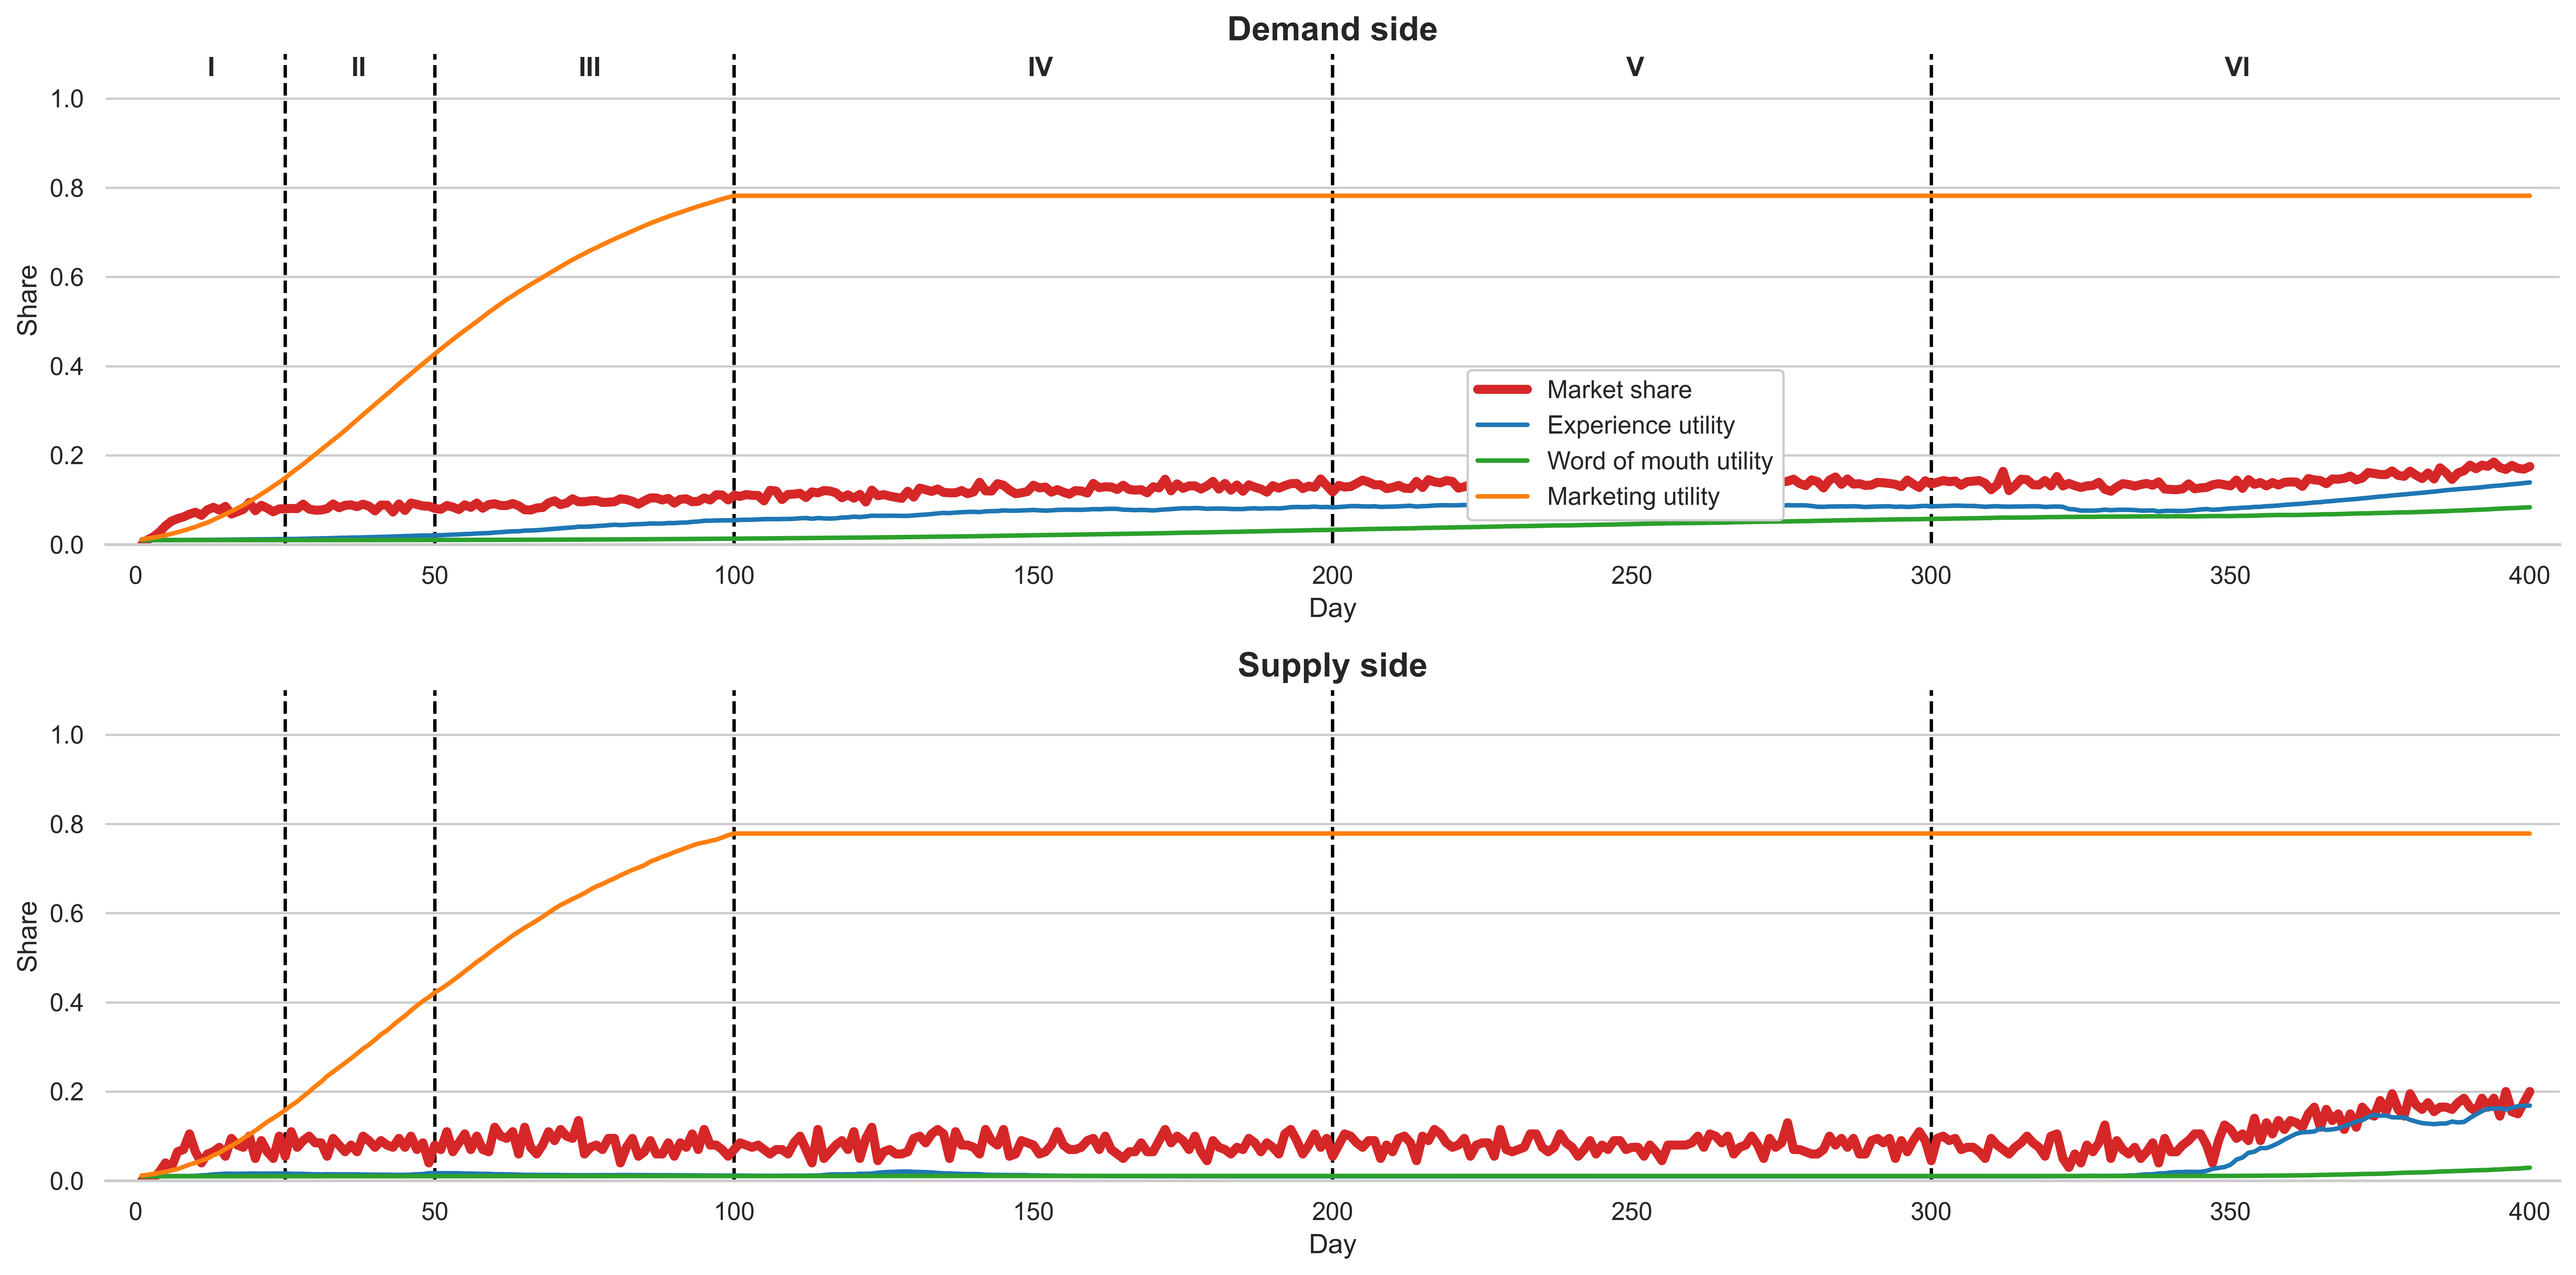

In [13]:
sim0 = sim_rln
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [18]:
sim = sim_rln

In [19]:
sim.res[100].veh_exp

nRIDES  nREJECTED  nDAYS_WORKED  DRIVING_TIME  IDLE_TIME  PICKUP_DIST  \
veh                                                                          
1       0.0        0.0          13.0           0.0        0.0         0.00   
2       0.0        0.0           8.0           0.0        0.0         0.00   
3       0.0        0.0           6.0           0.0        0.0         0.00   
4       0.0        0.0          10.0           0.0        0.0         0.00   
5       0.0        0.0          10.0           0.0        0.0         0.00   
..      ...        ...           ...           ...        ...          ...   
196     0.0        0.0          11.0           0.0        0.0         0.00   
197     0.0        0.0           5.0           0.0        0.0         0.00   
198    12.0        0.0           8.0       11319.0     9536.0        42.59   
199     0.0        0.0           8.0           0.0        0.0         0.00   
200     0.0        0.0           5.0           0.0        0.0         0.00   

     DRIVING_DIST  REVENUE     COST  COMMISSION  ...  \
veh                                              ...   
1            0.00    0.000   0.0000       0.000  ...   
2            0.00    0.000   0.0000       0.000  ...   
3            0.00    0.000   0.0000       0.000  ...   
4            0.00    0.000   0.0000       0.000  ...   
5            0.00    0.000   0.0000       0.000  ...   
..            ...      ...      ...         ...  ...   
196          0.00    0.000   0.0000       0.000  ...   
197          0.00    0.000   0.0000       0.000  ...   
198        113.19   60.912  28.2975      40.608  ...   
199          0.00    0.000   0.0000       0.000  ...   
200          0.00    0.000   0.0000       0.000  ...   

     IS_REJECTED_BY_TRAVELLER  ARRIVES_AT_PICKUP  MEETS_TRAVELLER_AT_PICKUP  \
veh                                                                           
1                           0                0.0                          0   
2                           0                0.0                          0   
3                           0                0.0                          0   
4                           0                0.0                          0   
5                           0                0.0                          0   
..                        ...                ...                        ...   
196                         0                0.0                          0   
197                         0                0.0                          0   
198                         0             4259.0                          0   
199                         0                0.0                          0   
200                         0                0.0                          0   

     DEPARTS_FROM_PICKUP ARRIVES_AT_DROPOFF  CONTINUES_SHIFT  \
veh                                                            
1                    0.0                0.0                0   
2                    0.0                0.0                0   
3                    0.0                0.0                0   
4                    0.0                0.0                0   
5                    0.0                0.0                0   
..                   ...                ...              ...   
196                  0.0                0.0                0   
197                  0.0                0.0                0   
198                360.0             7060.0                0   
199                  0.0                0.0                0   
200                  0.0                0.0                0   

     STARTS_REPOSITIONING  REPOSITIONED  DECIDES_NOT_TO_DRIVE  ENDS_SHIFT  
veh                                                                        
1                       0             0                     0         0.0  
2                       0             0                     0         0.0  
3                       0             0                     0         0.0  
4                   

In [20]:
df = pd.DataFrame()
np = []
nv = []
rev = []
for d in range(0,sim.params.nD):
    np.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    nv.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    rev.append(sim.res[d].pax_exp.plat_revenue.sum())

df['nP_share'] = np
df['nV_share'] = nv
df['Platform_rev'] = rev

df.to_csv('csv/baseline_fast_rev_only.csv')

In [22]:
sim.res[100].pax_exp.plat_revenue

pax
0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
         ...   
1995    0.00000
1996    0.00000
1997    0.00000
1998    0.00000
1999    3.35744
Name: plat_revenue, Length: 2000, dtype: float64

In [ ]:
df = pd.read_csv('csv/baseline_fast_h.csv')

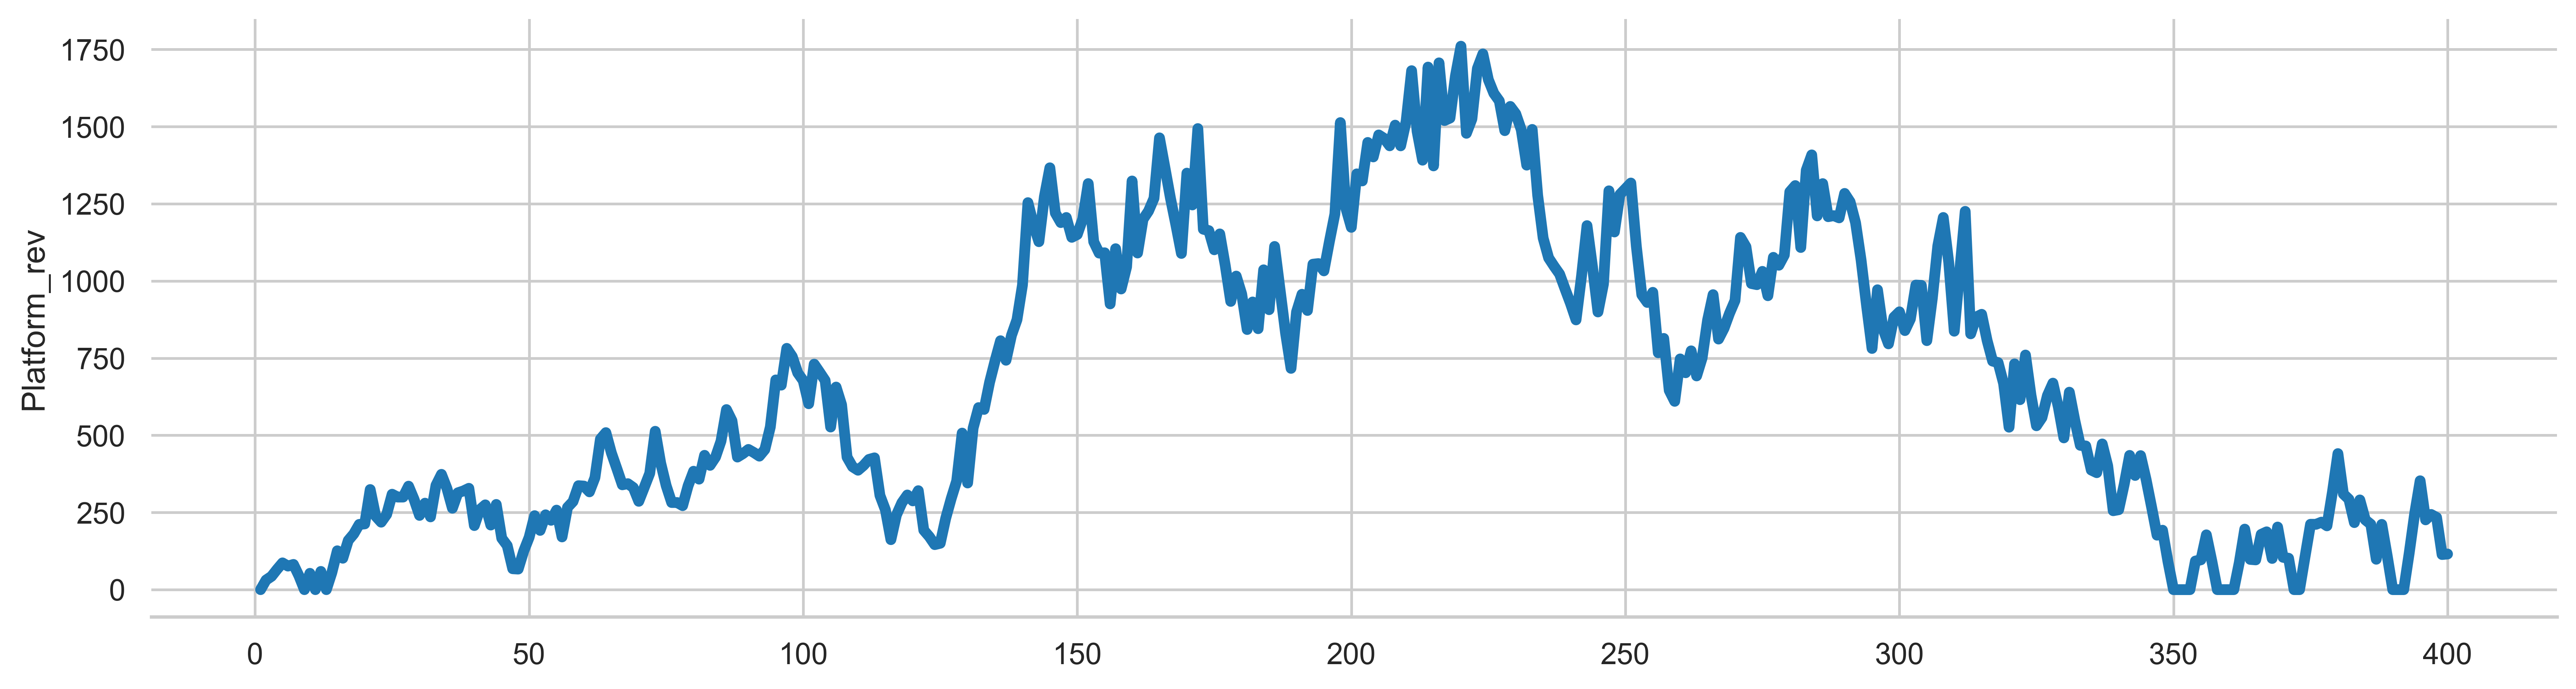

In [23]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev, lw=4)

<AxesSubplot:ylabel='Platform_rev'>

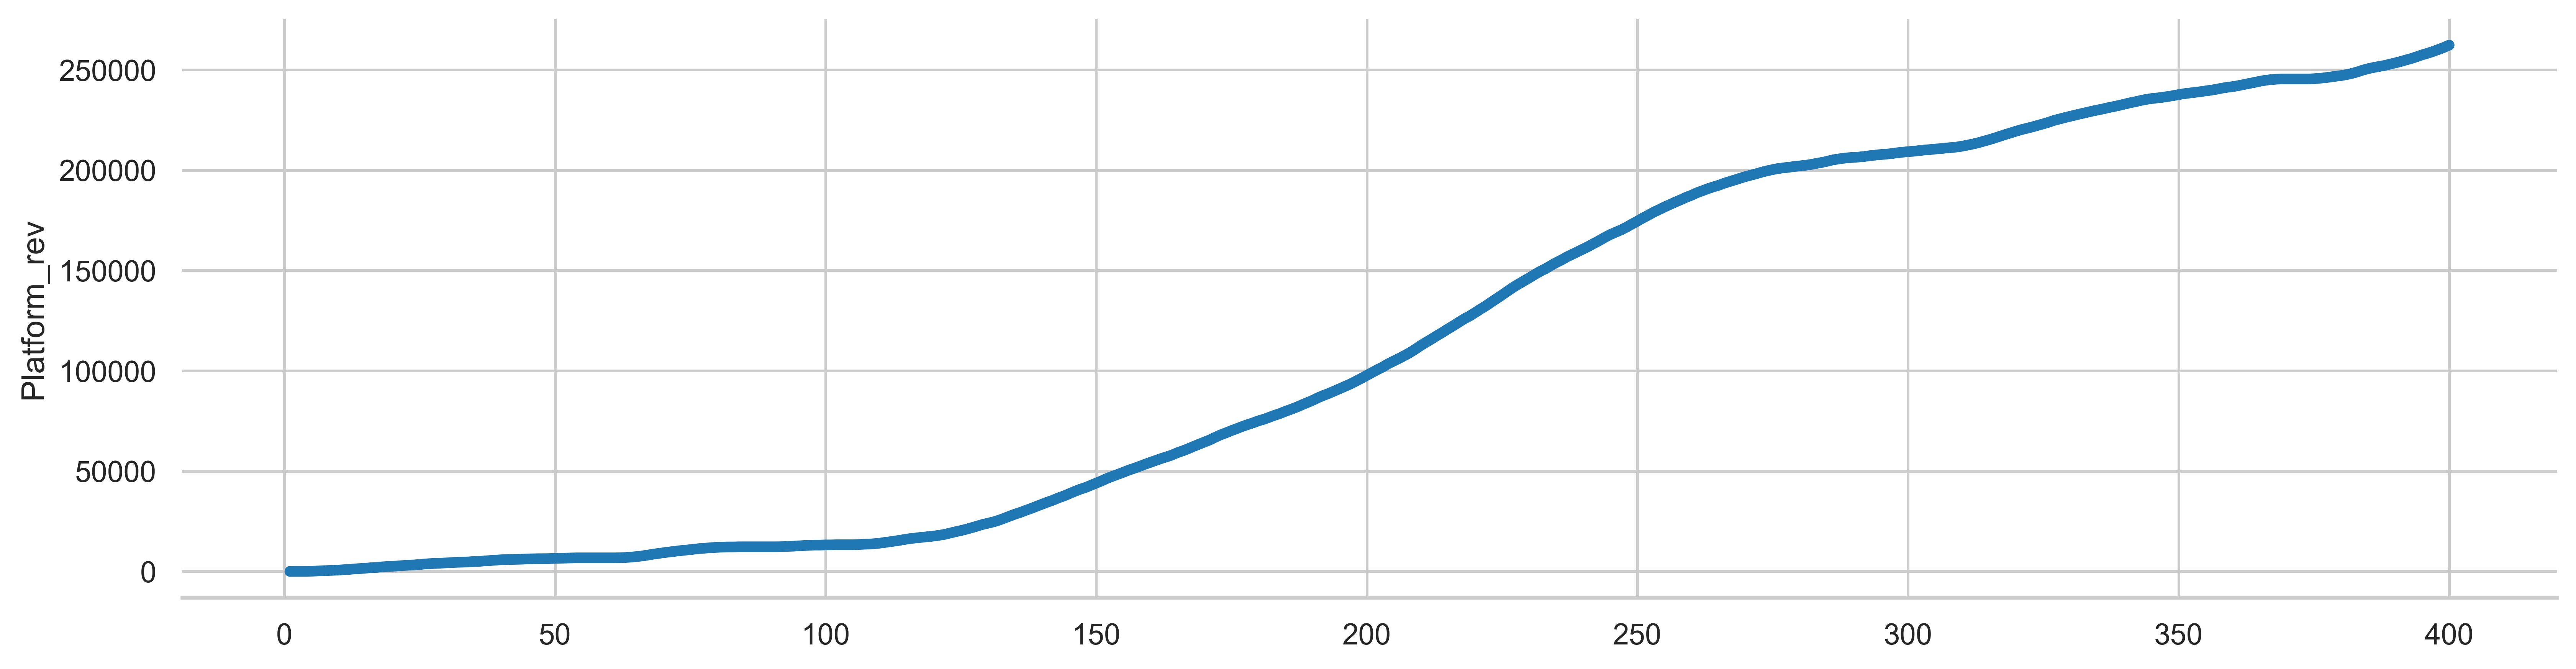

In [22]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev.cumsum(), lw=4)

In [46]:
sim.platforms.fare[1]

1.2

In [16]:
sim

In [34]:
df = pd.read_csv('csv/baseline_fast_rev_0.5nP_0.5nV.csv')
df

Unnamed: 0  nP_share  nV_share  Platform_rev
0             0    0.0000     0.000       0.00000
1             1    0.0070     0.005      15.29592
2             2    0.0155     0.010      23.63168
3             3    0.0250     0.010      20.00924
4             4    0.0400     0.035      59.92720
..          ...       ...       ...           ...
395         395    0.2650     0.200    1031.77092
396         396    0.2720     0.210    1250.62672
397         397    0.2565     0.190    1178.18820
398         398    0.2725     0.115    1081.69752
399         399    0.2735     0.160    1266.17554

[400 rows x 4 columns]

In [20]:
df.Platform_rev.mean()

655.7543860000001

In [9]:
df.Platform_rev.mean()

604.4805835000008

In [10]:
df.Platform_rev.cumsum()

0           0.00000
1           0.00000
2           0.00000
3           0.00000
4          19.35682
           ...     
395    237676.85714
396    238813.95026
397    239708.00418
398    240677.55240
399    241792.23340
Name: Platform_rev, Length: 400, dtype: float64

In [30]:
df.Platform_rev.mean()

582.0985324000001

In [31]:
df.Platform_rev.cumsum()

0           0.00000
1          13.69388
2          44.78640
3          90.17320
4         149.92560
           ...     
395    228671.27896
396    229671.55656
397    230685.35376
398    231702.18296
399    232839.41296
Name: Platform_rev, Length: 400, dtype: float64

In [28]:
df.Platform_rev.mean()

553.2985028000002

In [35]:
df.Platform_rev.cumsum()

0           0.00000
1          15.29592
2          38.92760
3          58.93684
4         118.86404
           ...     
395    216542.71314
396    217793.33986
397    218971.52806
398    220053.22558
399    221319.40112
Name: Platform_rev, Length: 400, dtype: float64

In [26]:
df.Platform_rev.mean()

602.1789189999998

In [33]:
df.Platform_rev.cumsum()

0           0.00000
1           0.00000
2          13.21864
3          53.39316
4          80.25430
           ...     
395    236196.97054
396    237392.87096
397    238450.85096
398    239605.73920
399    240871.56760
Name: Platform_rev, Length: 400, dtype: float64

In [36]:
20/582

0.03436426116838488

In [ ]:
=====================================================================================

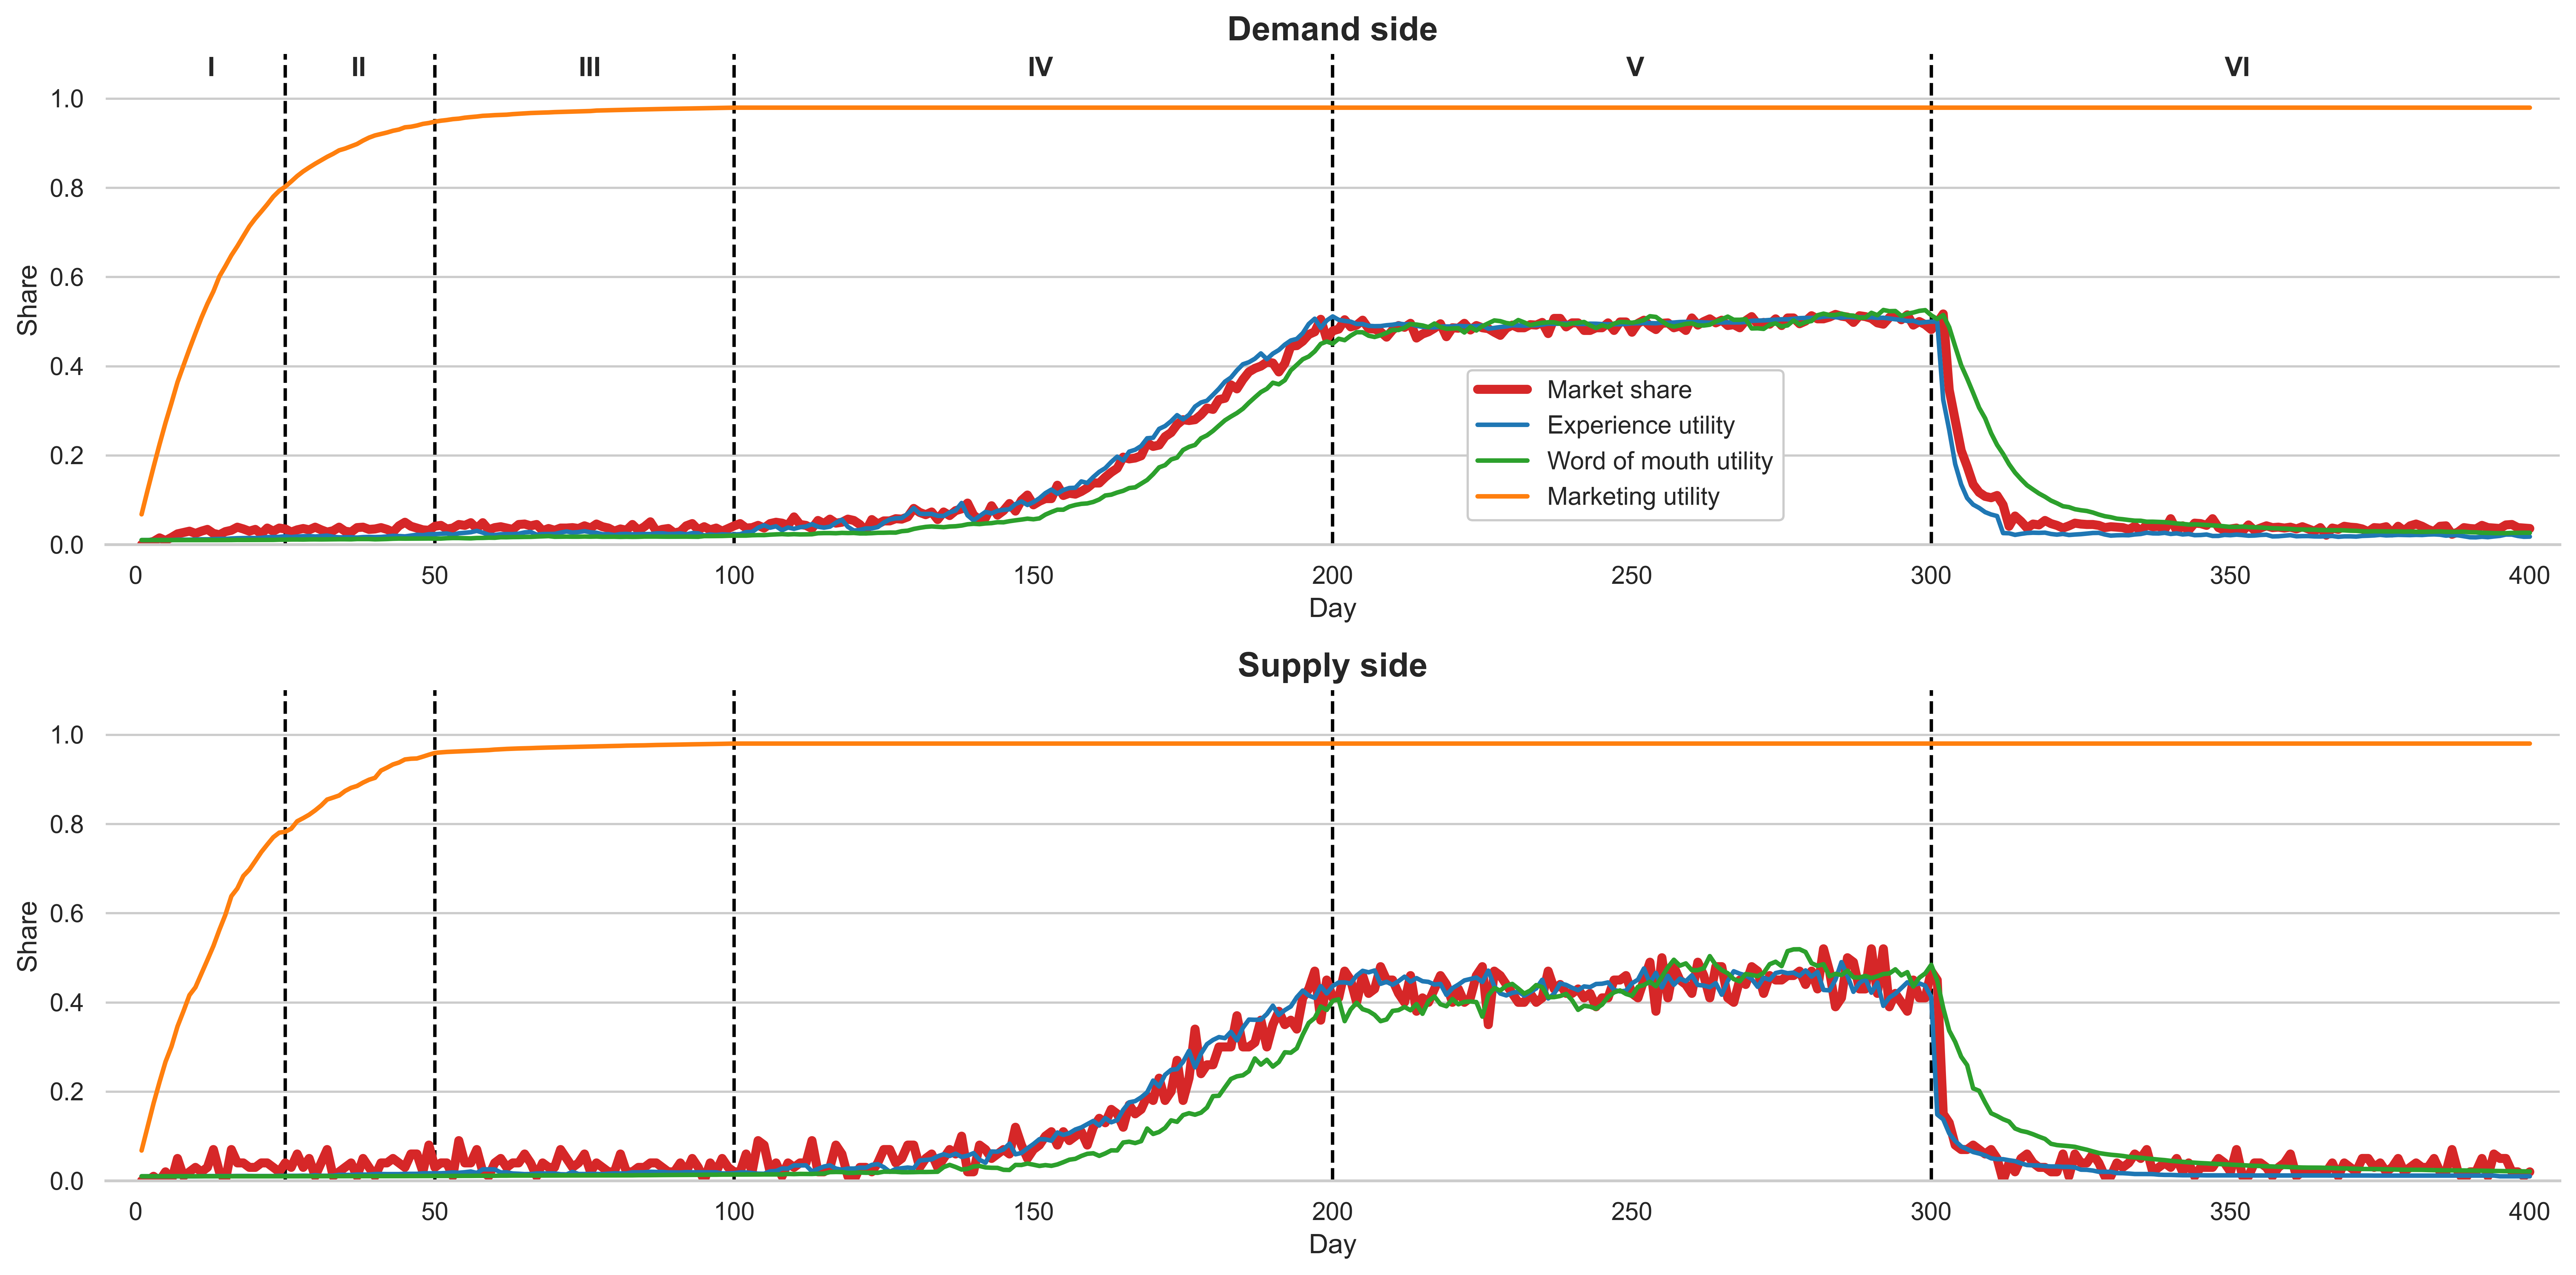

In [7]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 5
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

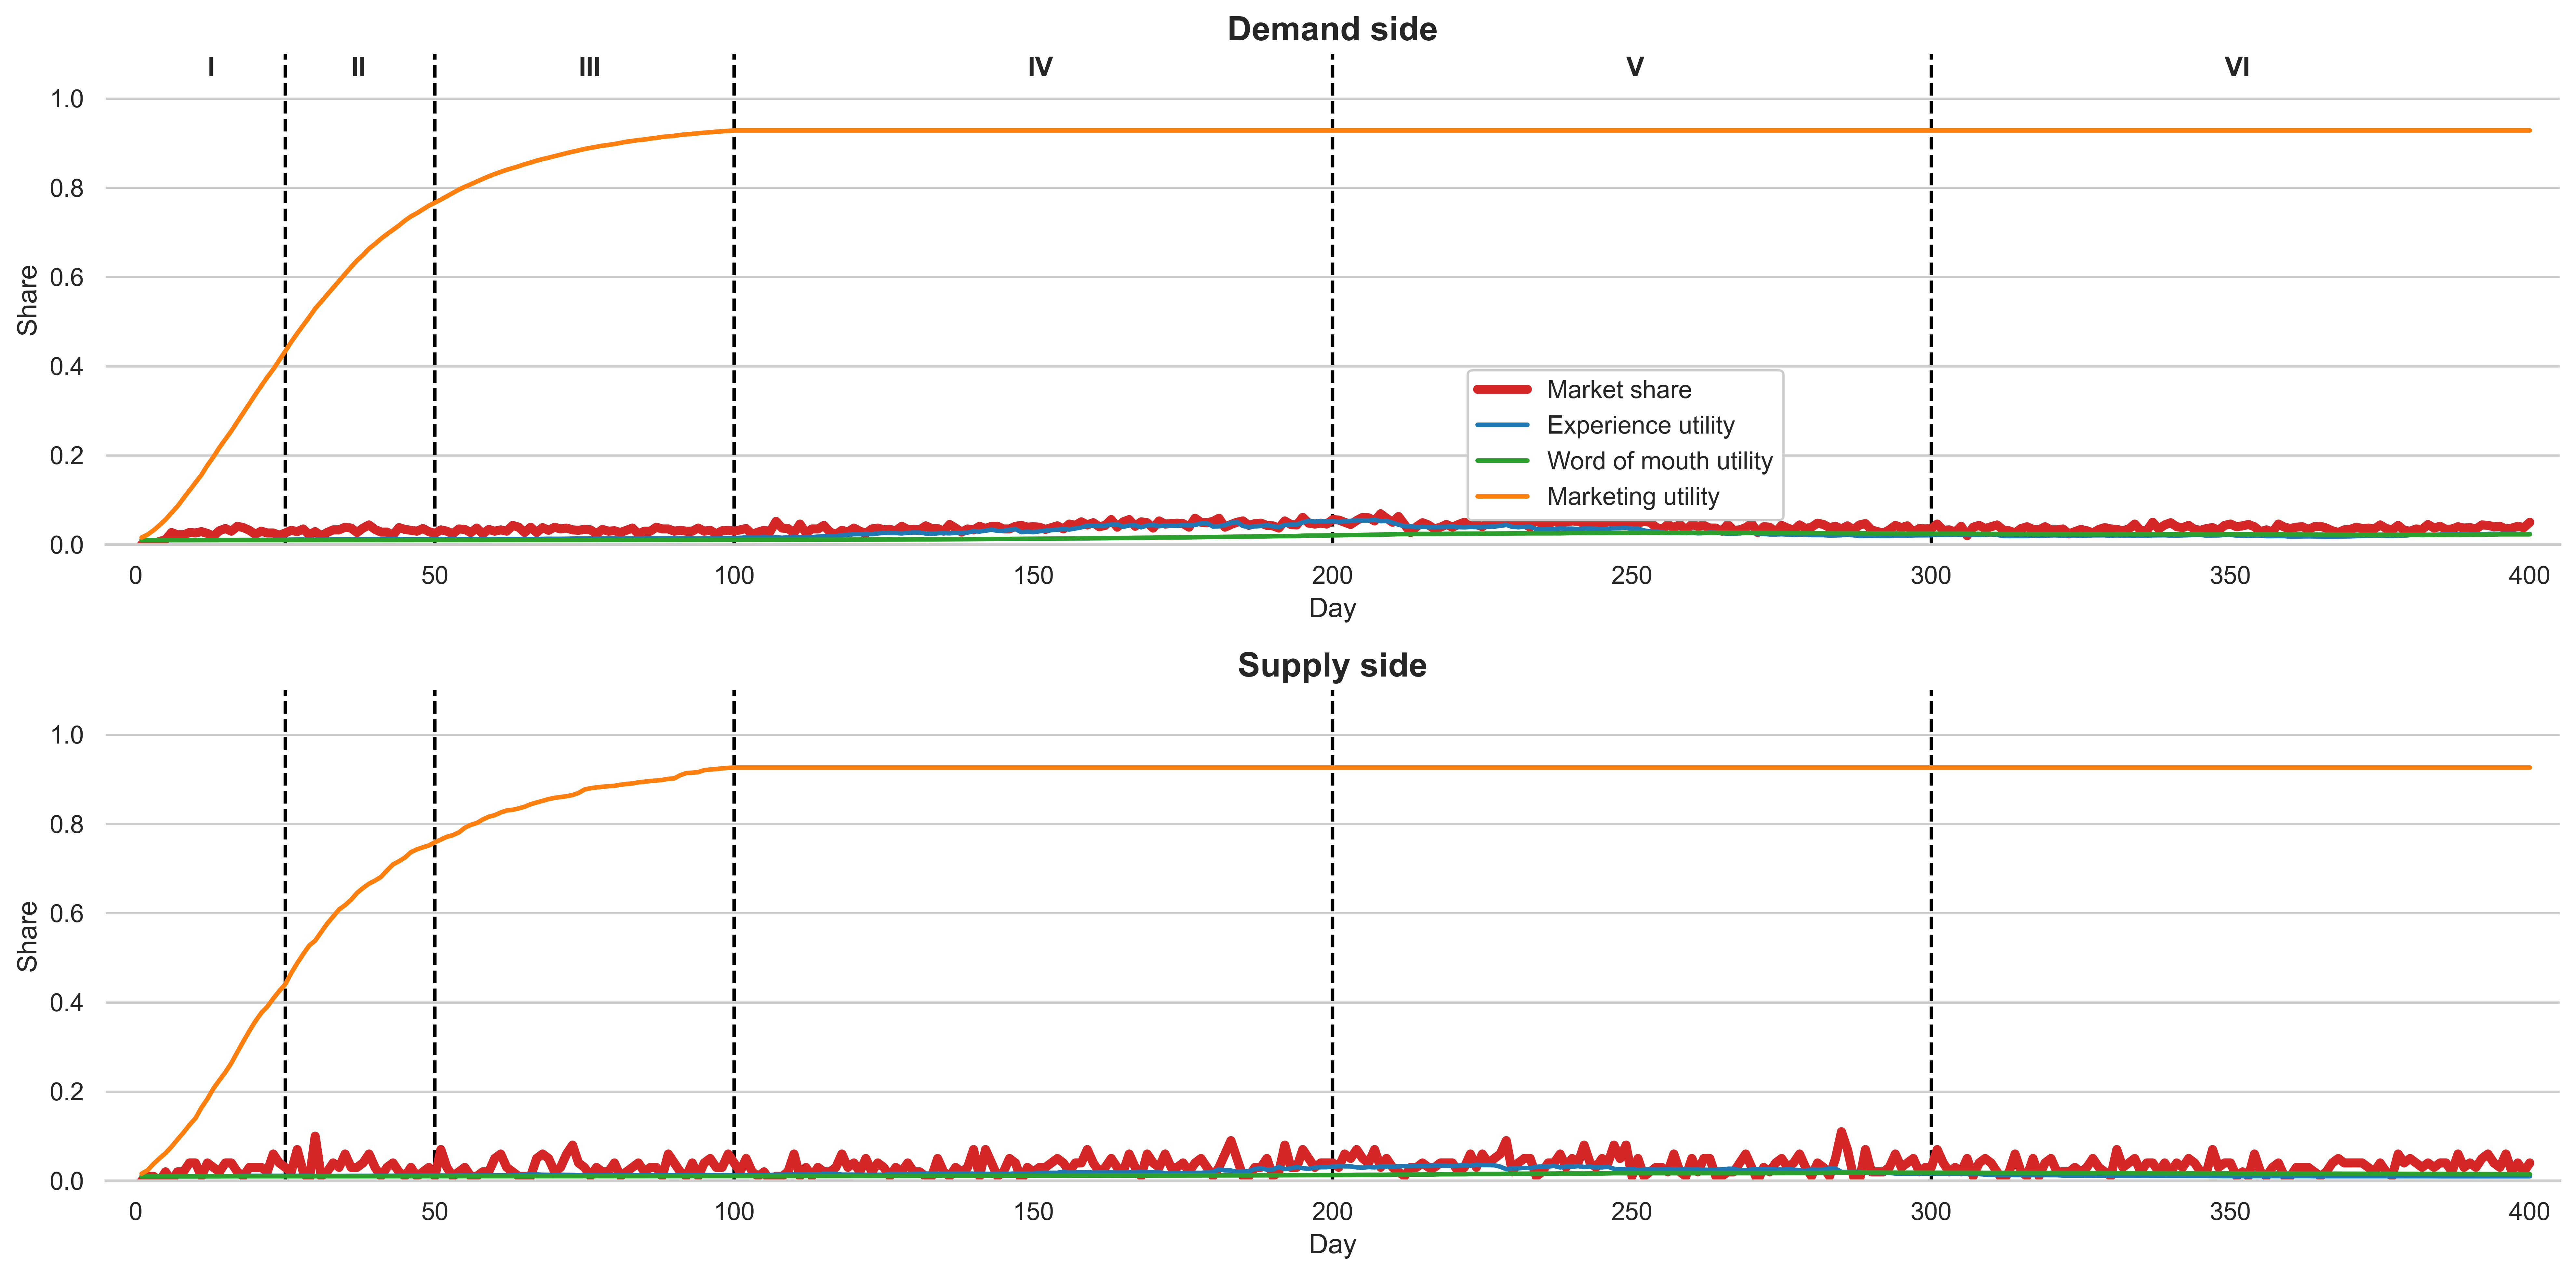

In [7]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

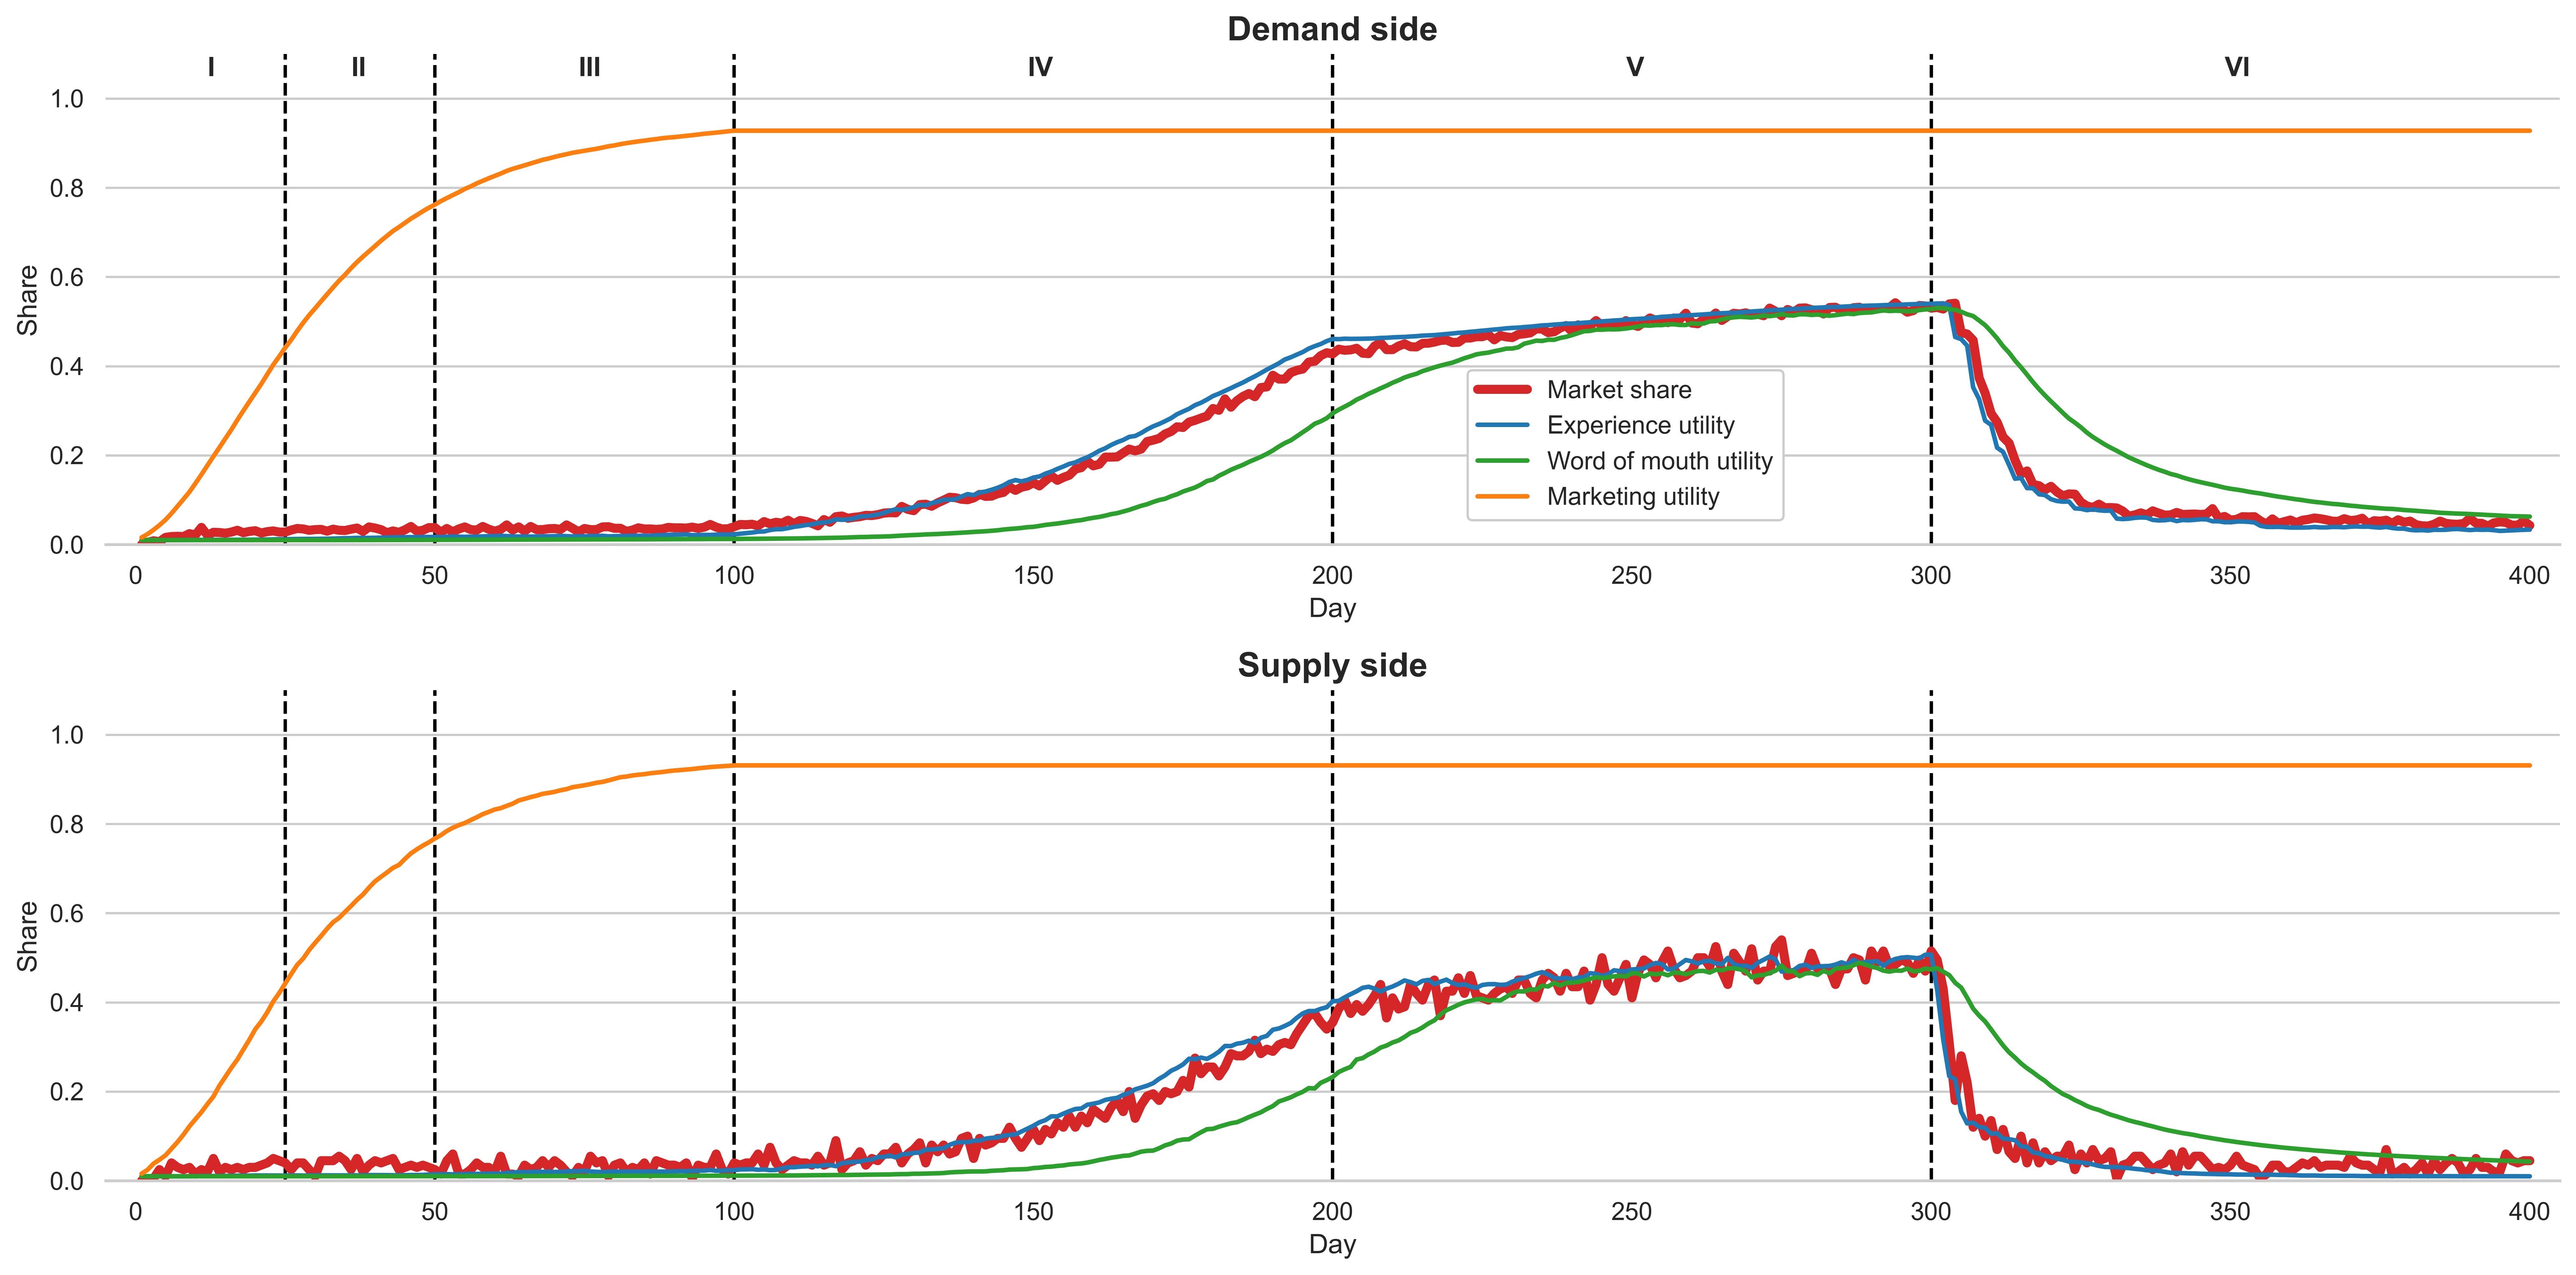

In [7]:
# nV=200, nP=2000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

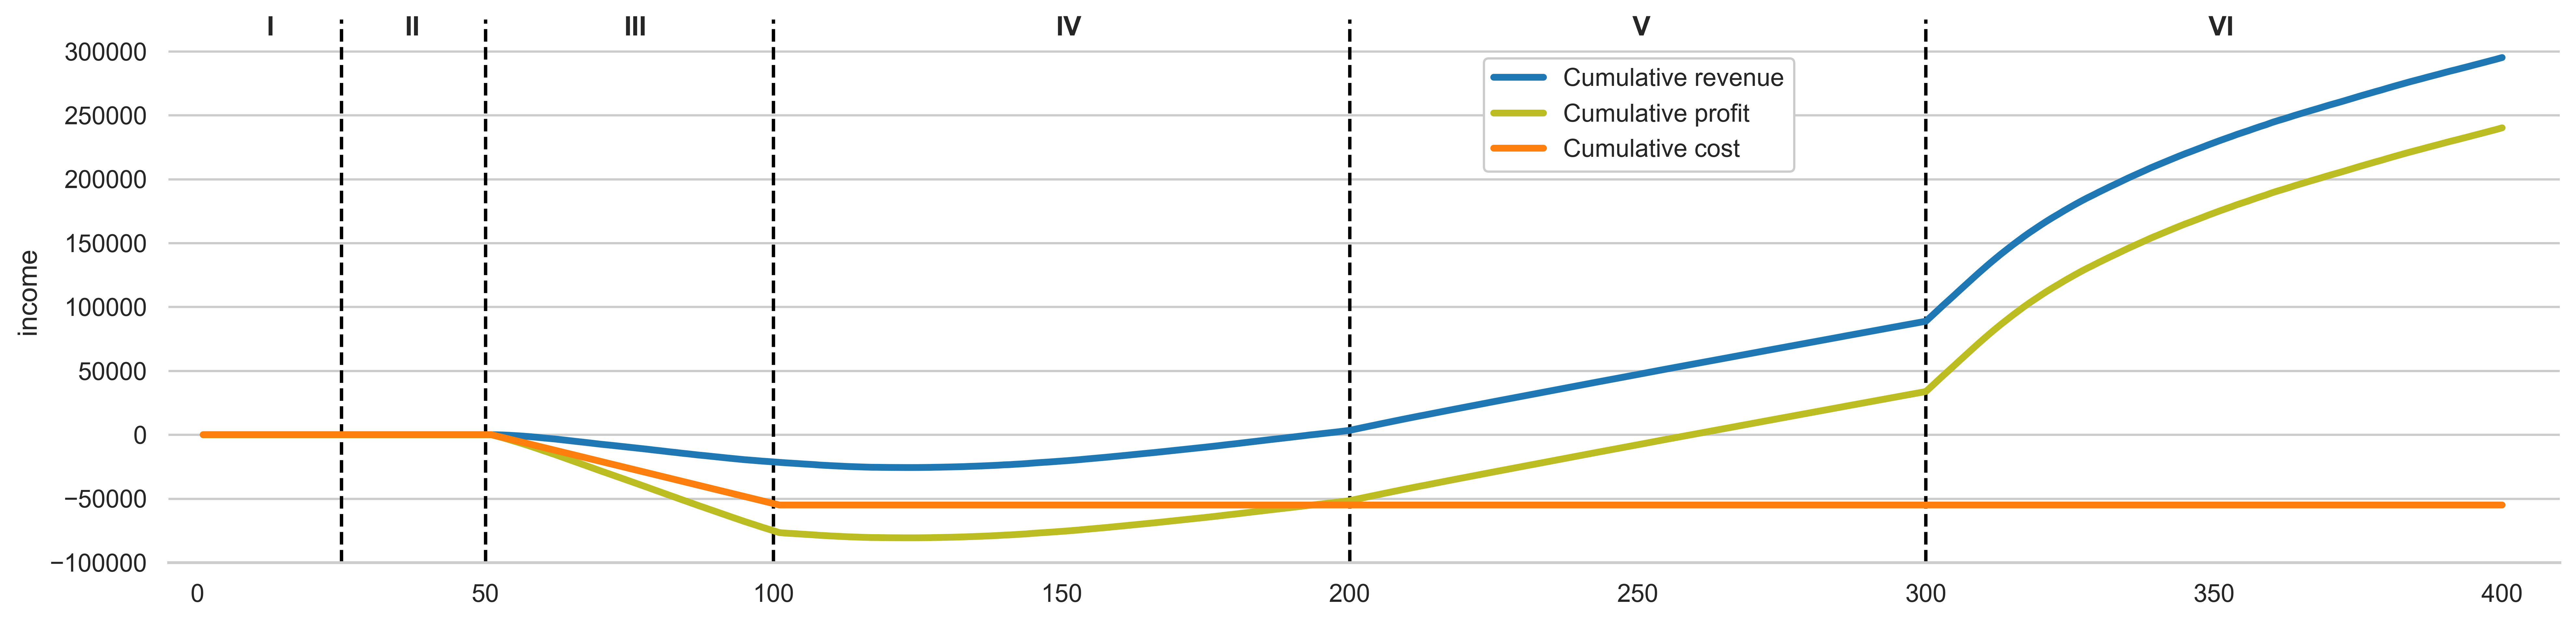

In [177]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')

In [21]:
df = pd.read_csv('csv/baseline_fast.csv')
df

Unnamed: 0  nP_share  nV_share  Platform_rev
0             0    0.0000     0.000       0.00000
1             1    0.0120     0.005      21.47460
2             2    0.0220     0.015      34.04332
3             3    0.0300     0.025      42.06120
4             4    0.0325     0.015      49.05952
..          ...       ...       ...           ...
395         395    0.1665     0.115    1123.47240
396         396    0.1555     0.080    1085.47640
397         397    0.1495     0.105     993.22100
398         398    0.1590     0.060    1099.28520
399         399    0.1540     0.090    1055.16860

[400 rows x 4 columns]

In [22]:
df.Platform_rev.max()

4098.8442

In [ ]:
2638.8502